In [1]:
exp_odir = 'output/echam-6.3.05p2-wiso/pi/'
expid = [
    # 'pi_m_416_4.9',
    'pi_m_502_5.0',
    ]
i = 0

# import packages

In [2]:
# -----------------------------------------------------------------------------
# region import packages

# management
import glob
import pickle
import warnings
warnings.filterwarnings('ignore')
import os
import sys  # print(sys.path)
sys.path.append('/work/ollie/qigao001')
os.chdir('/work/ollie/qigao001/')
# data analysis
import numpy as np
import xarray as xr
import dask
dask.config.set({"array.slicing.split_large_chunks": True})
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()
from scipy import stats
import xesmf as xe
import pandas as pd
from metpy.interpolate import cross_section
from statsmodels.stats import multitest
import pycircstat as circ
from scipy.stats import circstd

# plot
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib import cm
import cartopy.crs as ccrs
plt.rcParams['pcolor.shading'] = 'auto'
mpl.rcParams['figure.dpi'] = 600
mpl.rc('font', family='Times New Roman', size=10)
mpl.rcParams['axes.linewidth'] = 0.2
plt.rcParams.update({"mathtext.fontset": "stix"})
import matplotlib.animation as animation
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

# self defined
from a_basic_analysis.b_module.mapplot import (
    globe_plot,
    hemisphere_plot,
    quick_var_plot,
    mesh2plot,
    framework_plot1,
    remove_trailing_zero,
    remove_trailing_zero_pos,
)

from a_basic_analysis.b_module.basic_calculations import (
    mon_sea_ann,
    find_ilat_ilon,
)

from a_basic_analysis.b_module.namelist import (
    month,
    month_num,
    month_dec,
    month_dec_num,
    seasons,
    seasons_last_num,
    hours,
    months,
    month_days,
    zerok,
    panel_labels,
    seconds_per_d,
)

from a_basic_analysis.b_module.source_properties import (
    source_properties,
    calc_lon_diff,
)

from a_basic_analysis.b_module.statistics import (
    fdr_control_bh,
    check_normality_3d,
    check_equal_variance_3d,
    ttest_fdr_control,
)

from a_basic_analysis.b_module.component_plot import (
    cplot_ice_cores,
    plt_mesh_pars,
)

# endregion
# -----------------------------------------------------------------------------

# import data

In [3]:
wisoaprt_alltime_icores = {}
with open(
    exp_odir + expid[i] + '/analysis/jsbach/' + expid[i] + '.wisoaprt_alltime_icores.pkl', 'rb') as f:
    wisoaprt_alltime_icores[expid[i]] = pickle.load(f)


In [4]:
pre_weighted_var_icores = {}
with open(
    exp_odir + expid[i] + '/analysis/jsbach/' + expid[i] + '.pre_weighted_var_icores.pkl', 'rb') as f:
    pre_weighted_var_icores[expid[i]] = pickle.load(f)


# check daily precipitation

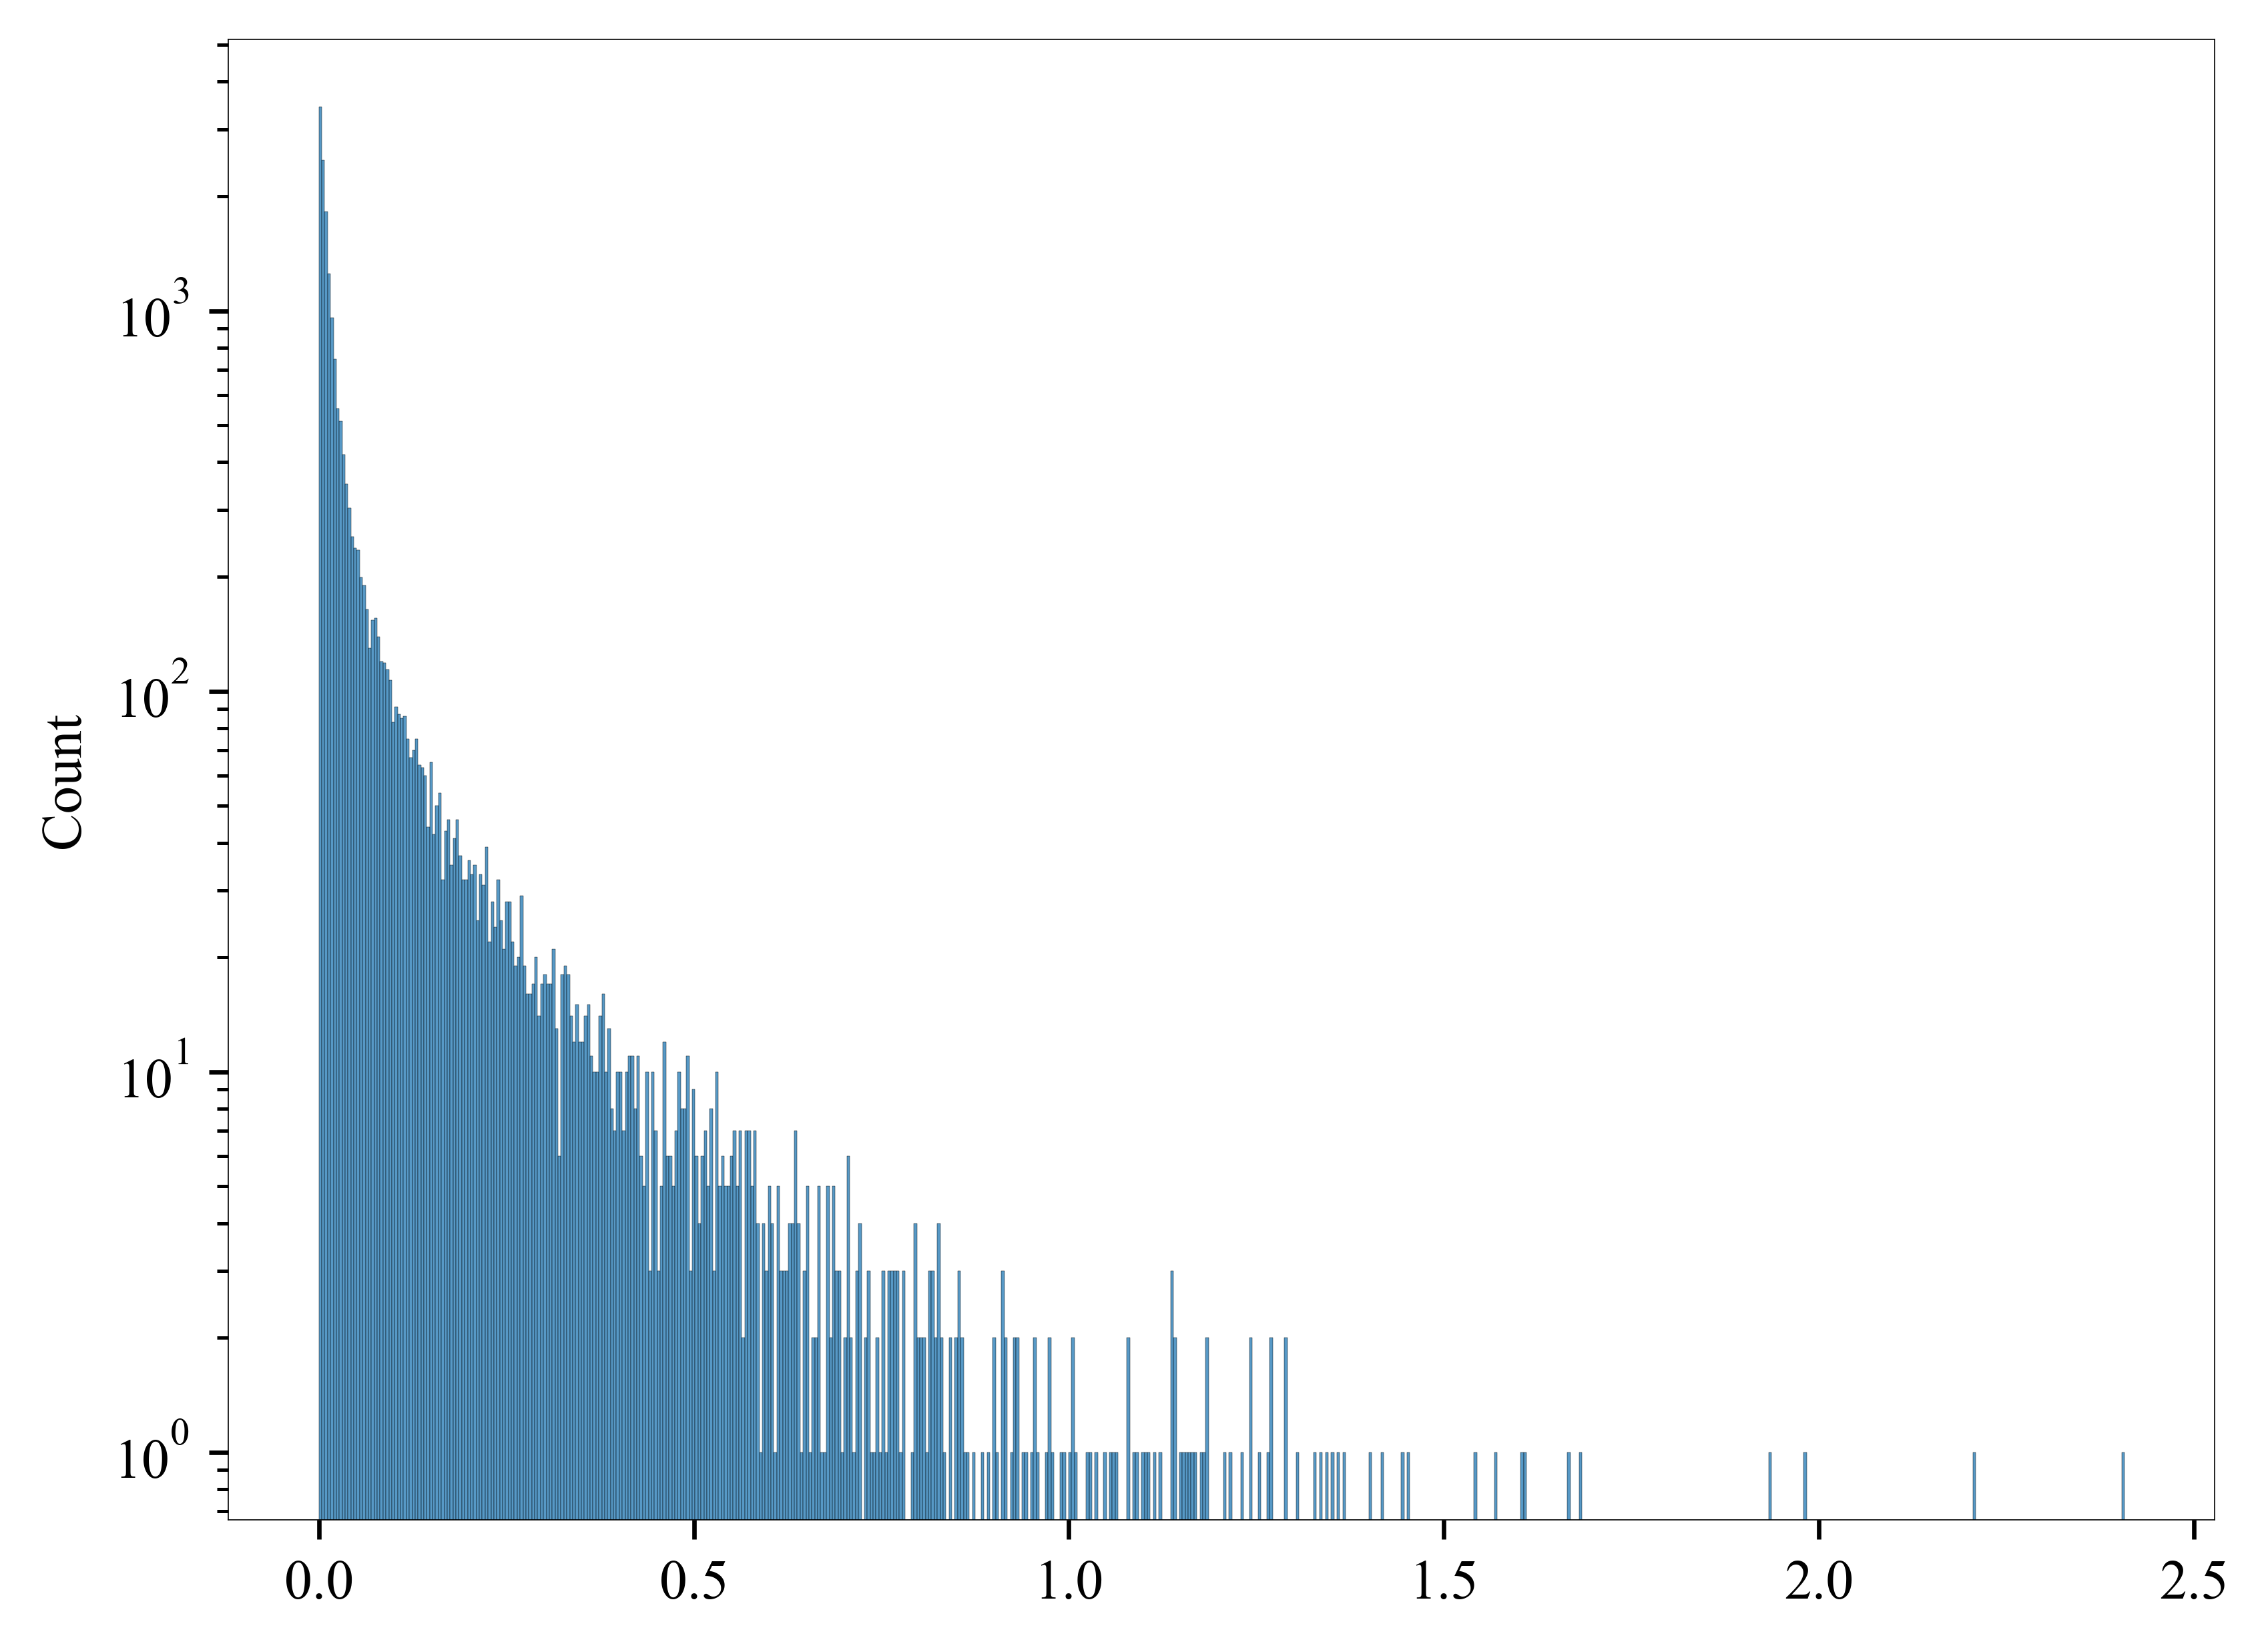

In [34]:
ax = sns.histplot(
    wisoaprt_alltime_icores[expid[i]]['EDC']['daily'].sel(wisotype=1) * seconds_per_d,
    log_scale=(False, True),
    # stat='probability',
    )

<AxesSubplot:ylabel='Count'>

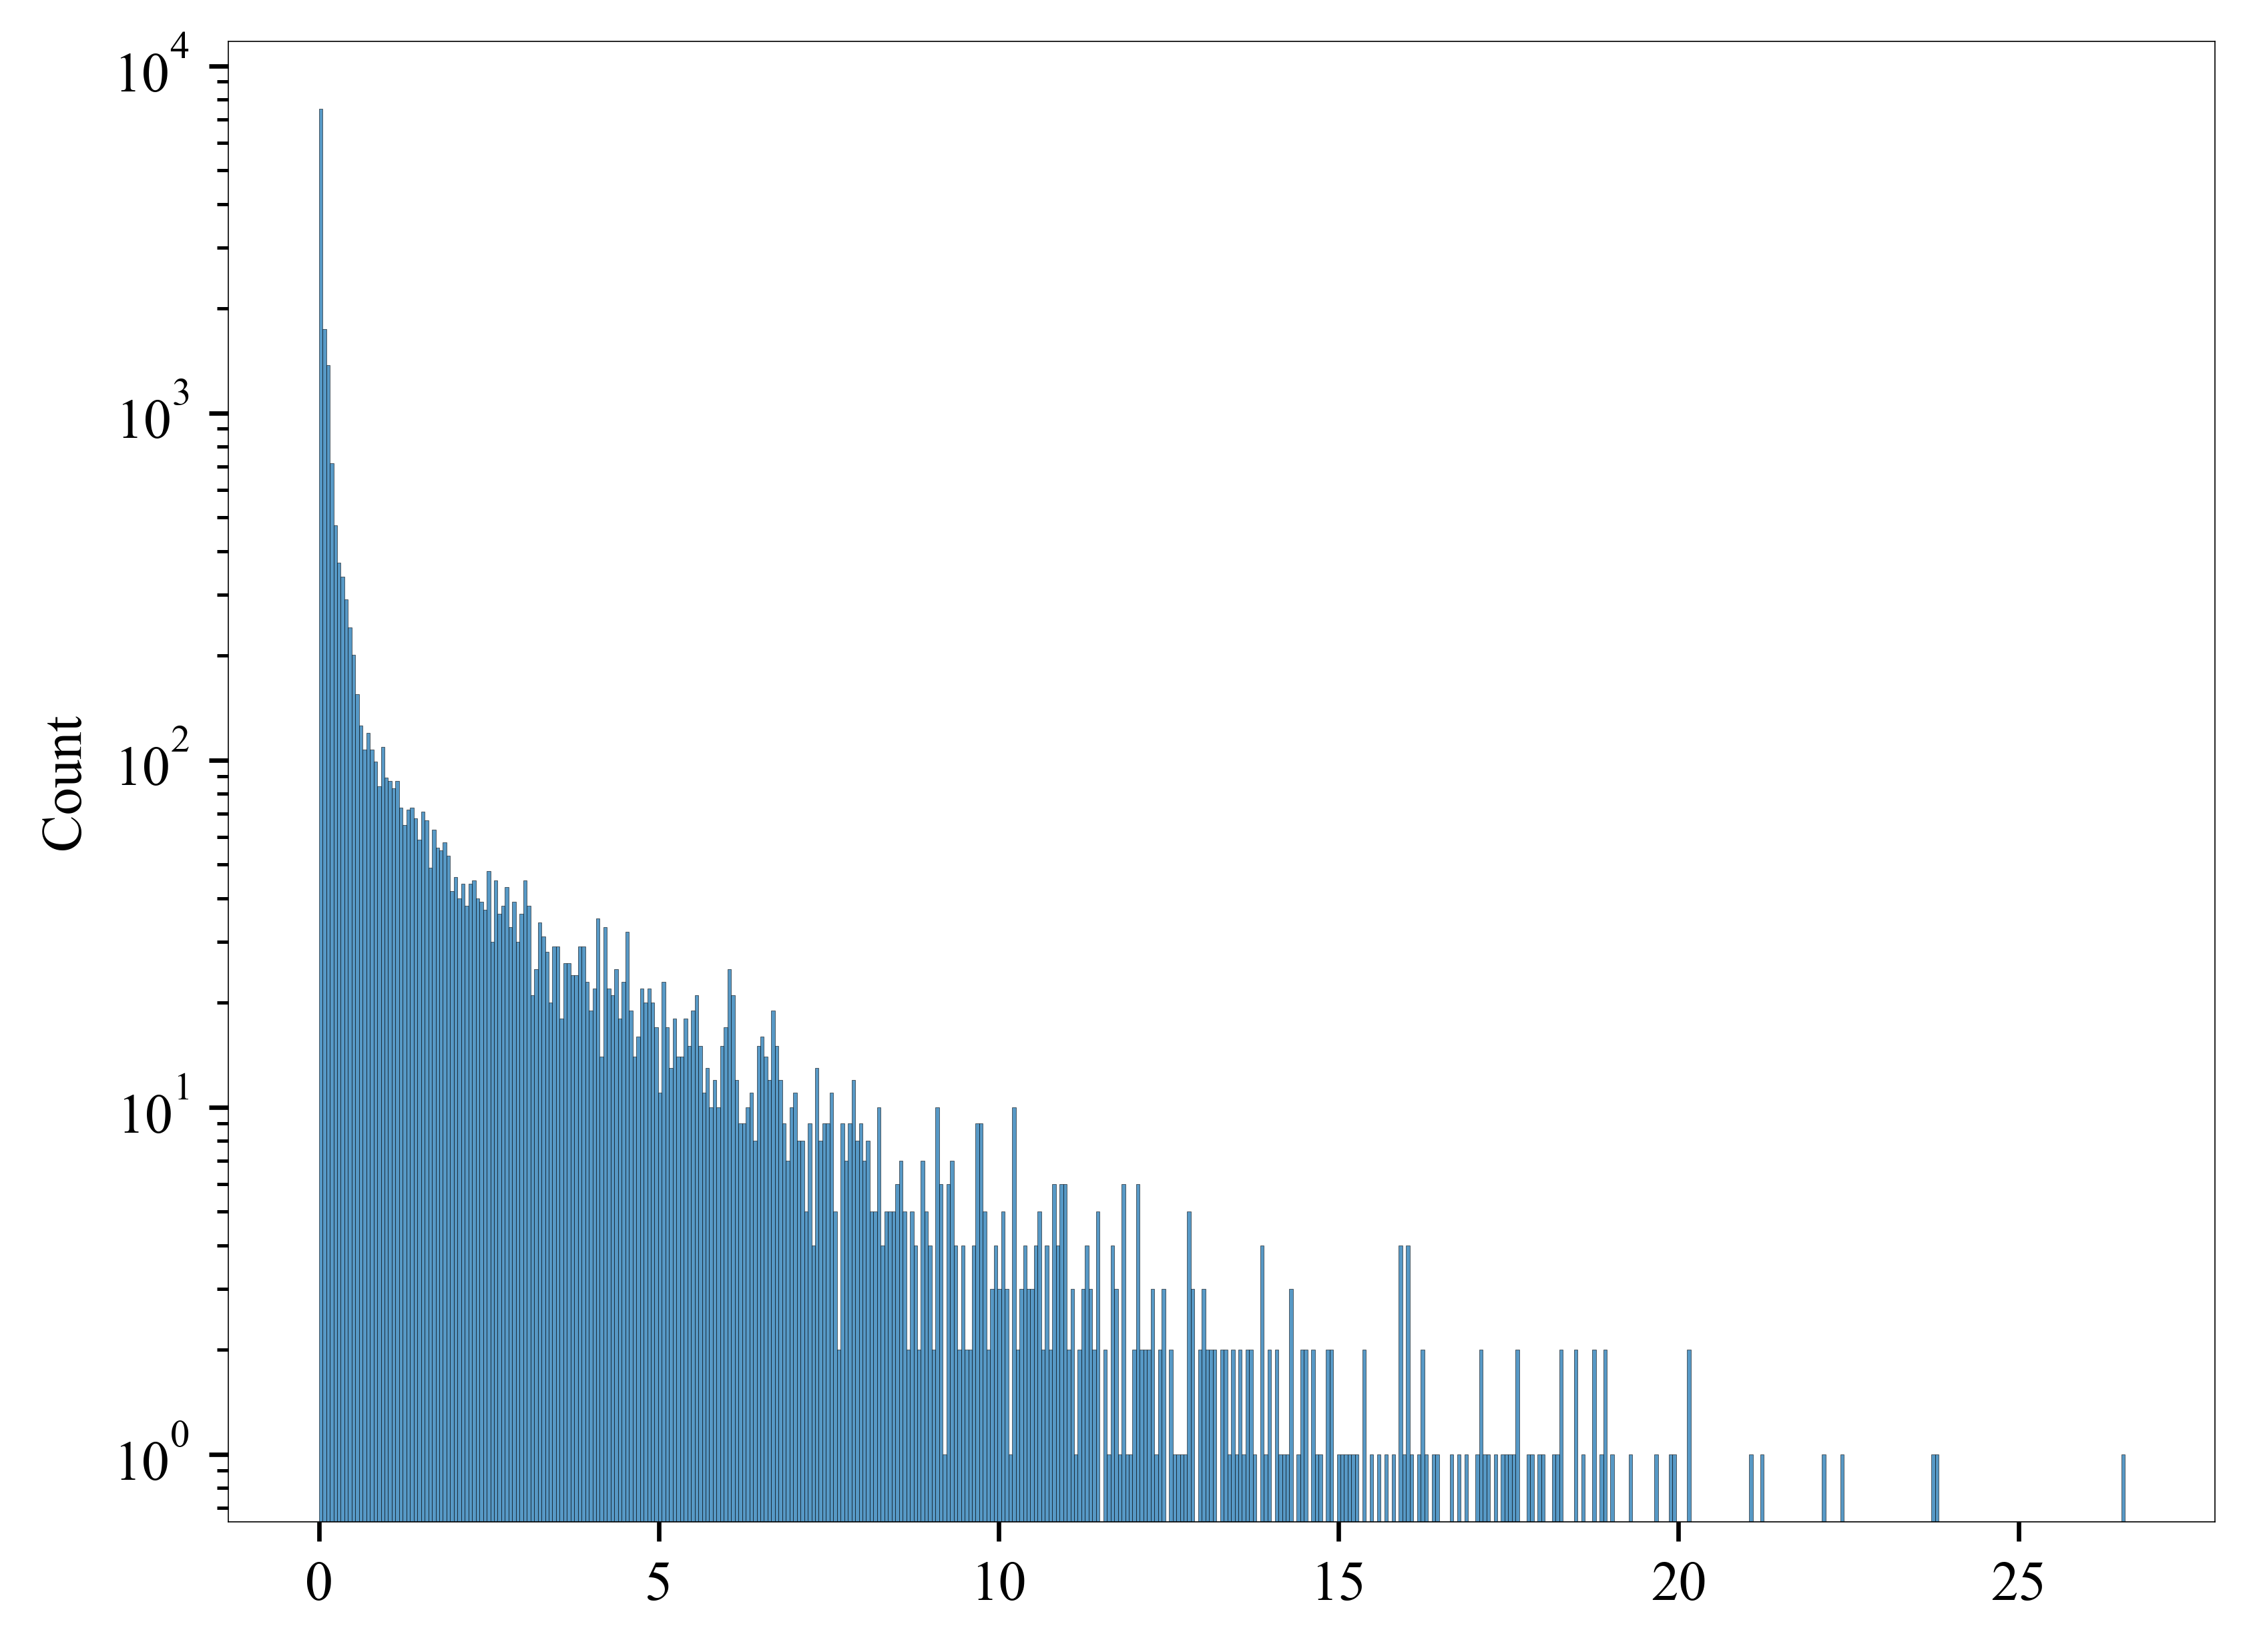

In [27]:
sns.histplot(
    wisoaprt_alltime_icores[expid[i]]['Halley']['daily'].sel(wisotype=1) * seconds_per_d,
    log_scale=(False, True)
    )

# check daily distance

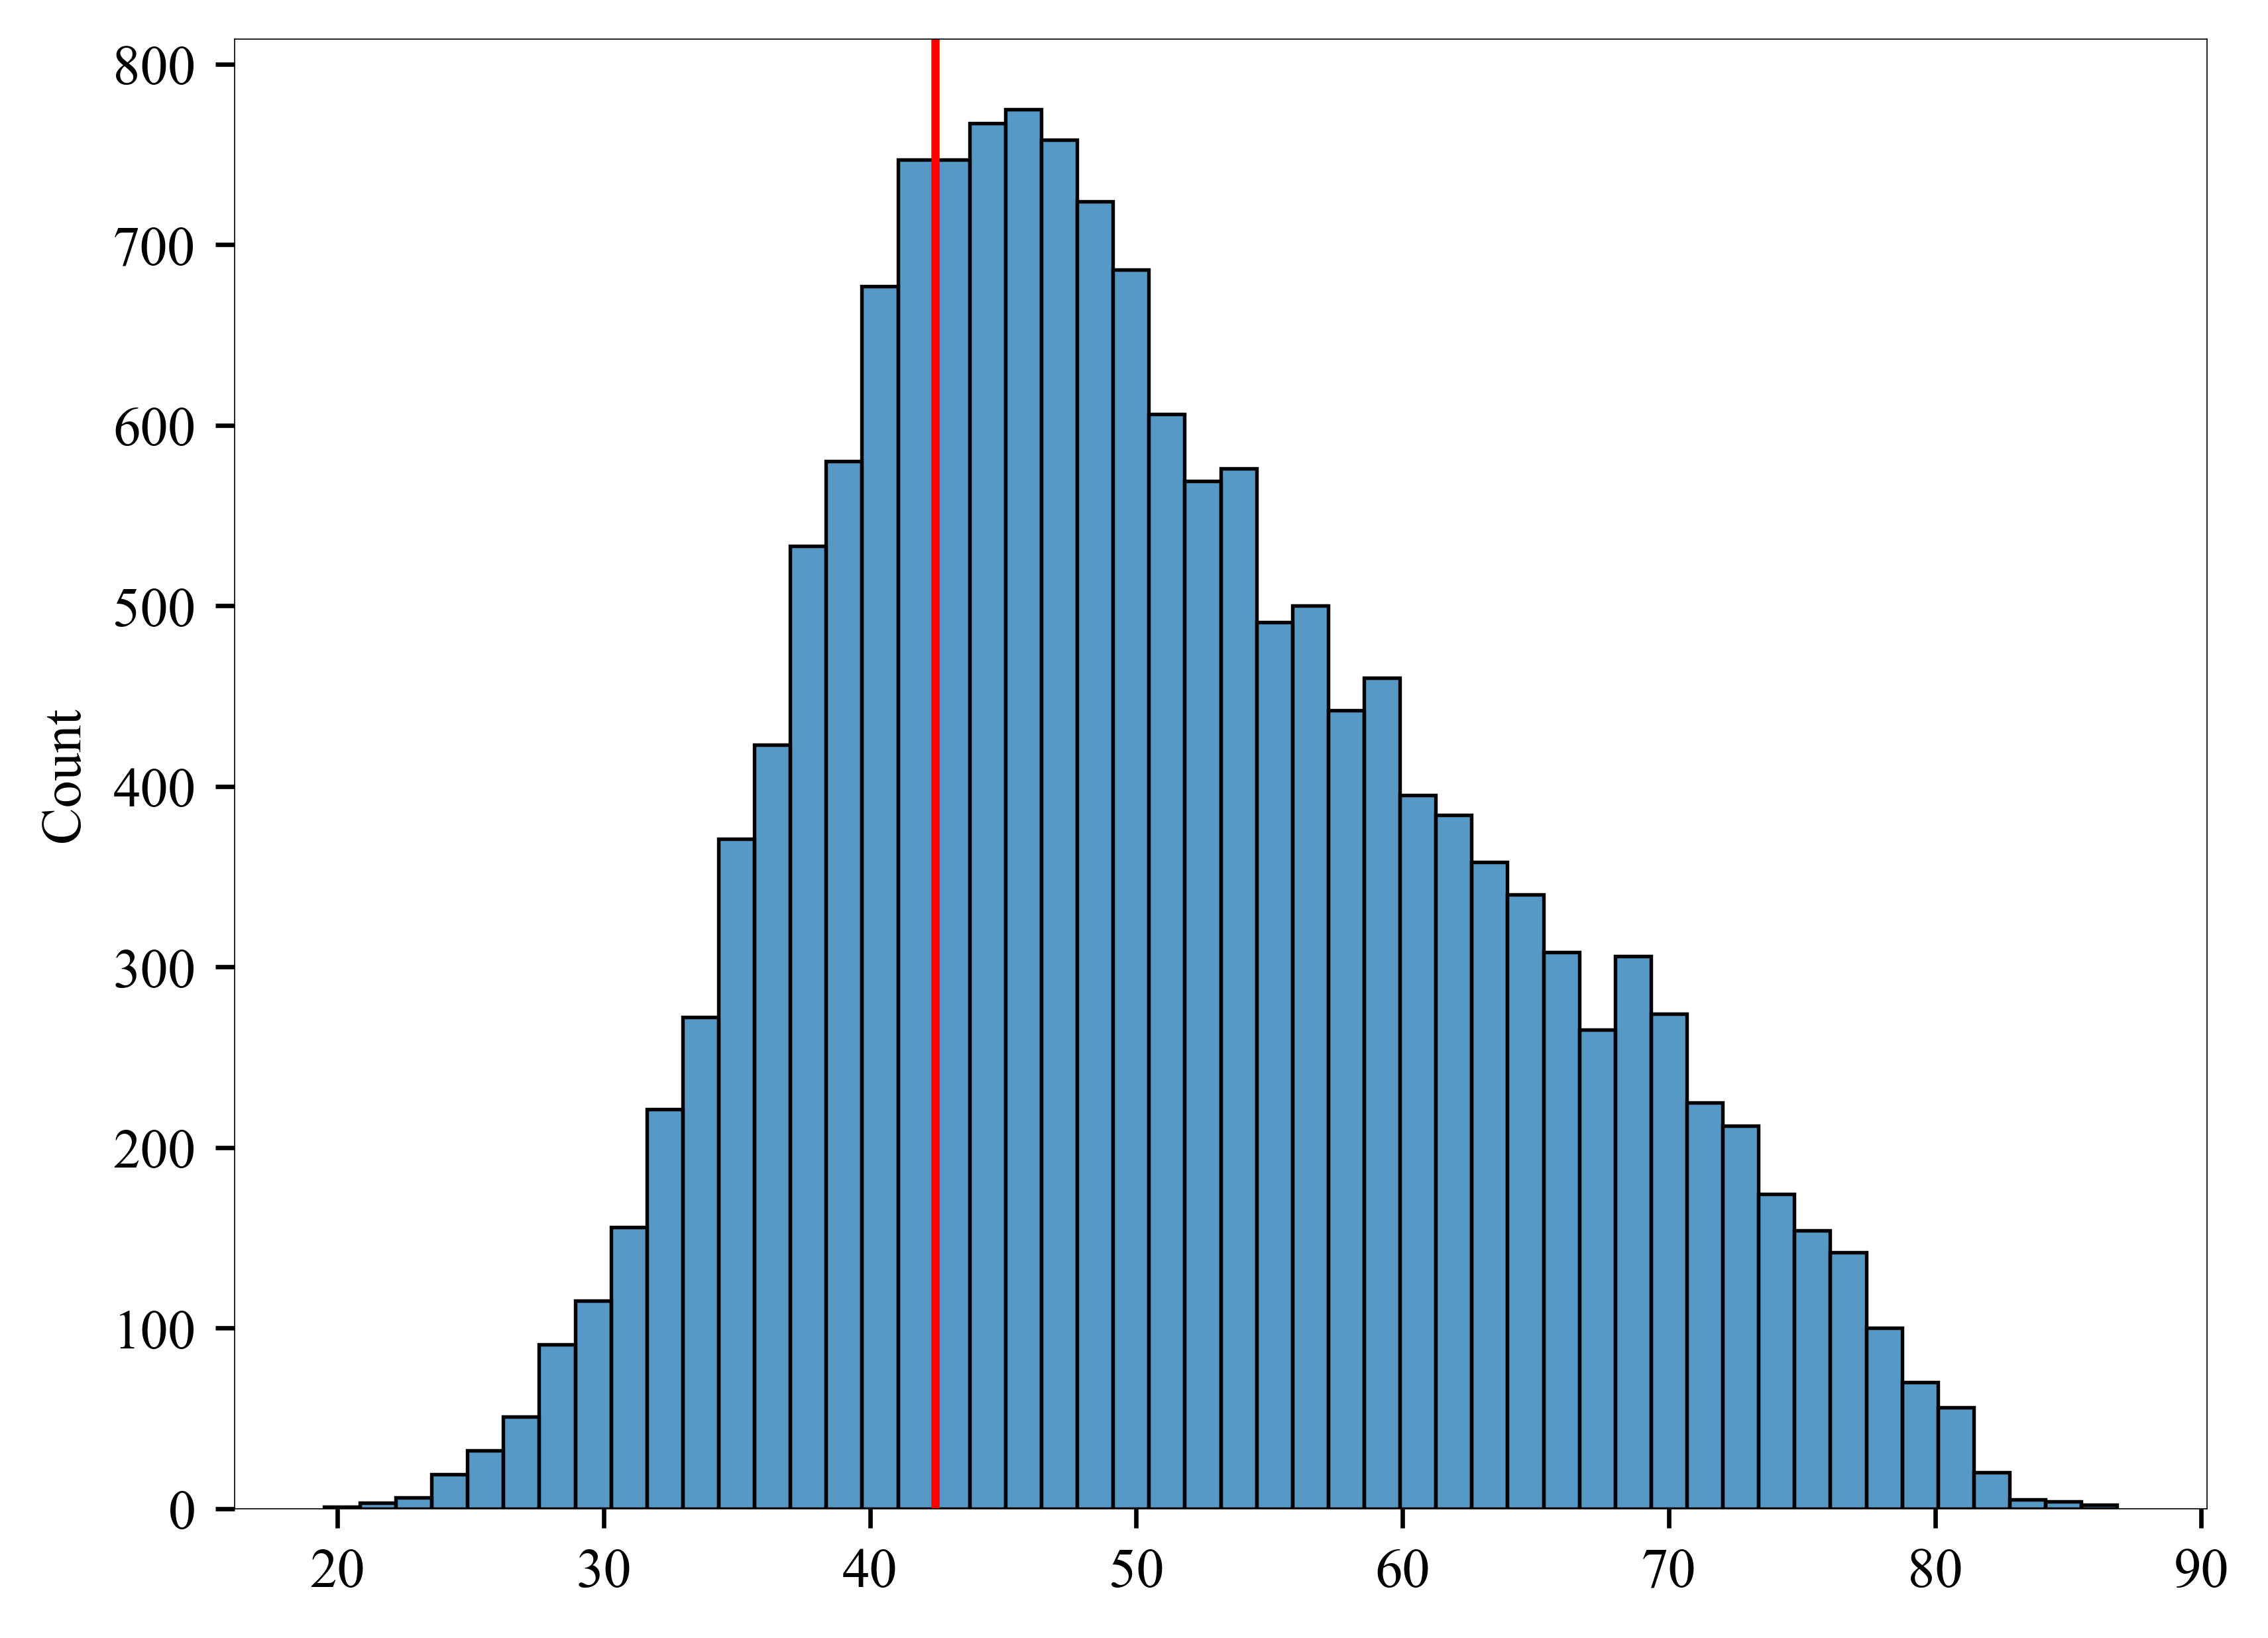

In [49]:
istation = 'EDC'
ivar = 'distance'
ax = sns.histplot(
    pre_weighted_var_icores[expid[i]][istation][ivar]['daily']
)

ax.axvline(
    pre_weighted_var_icores[expid[i]][istation][ivar]['am'],
    c = 'red',
)

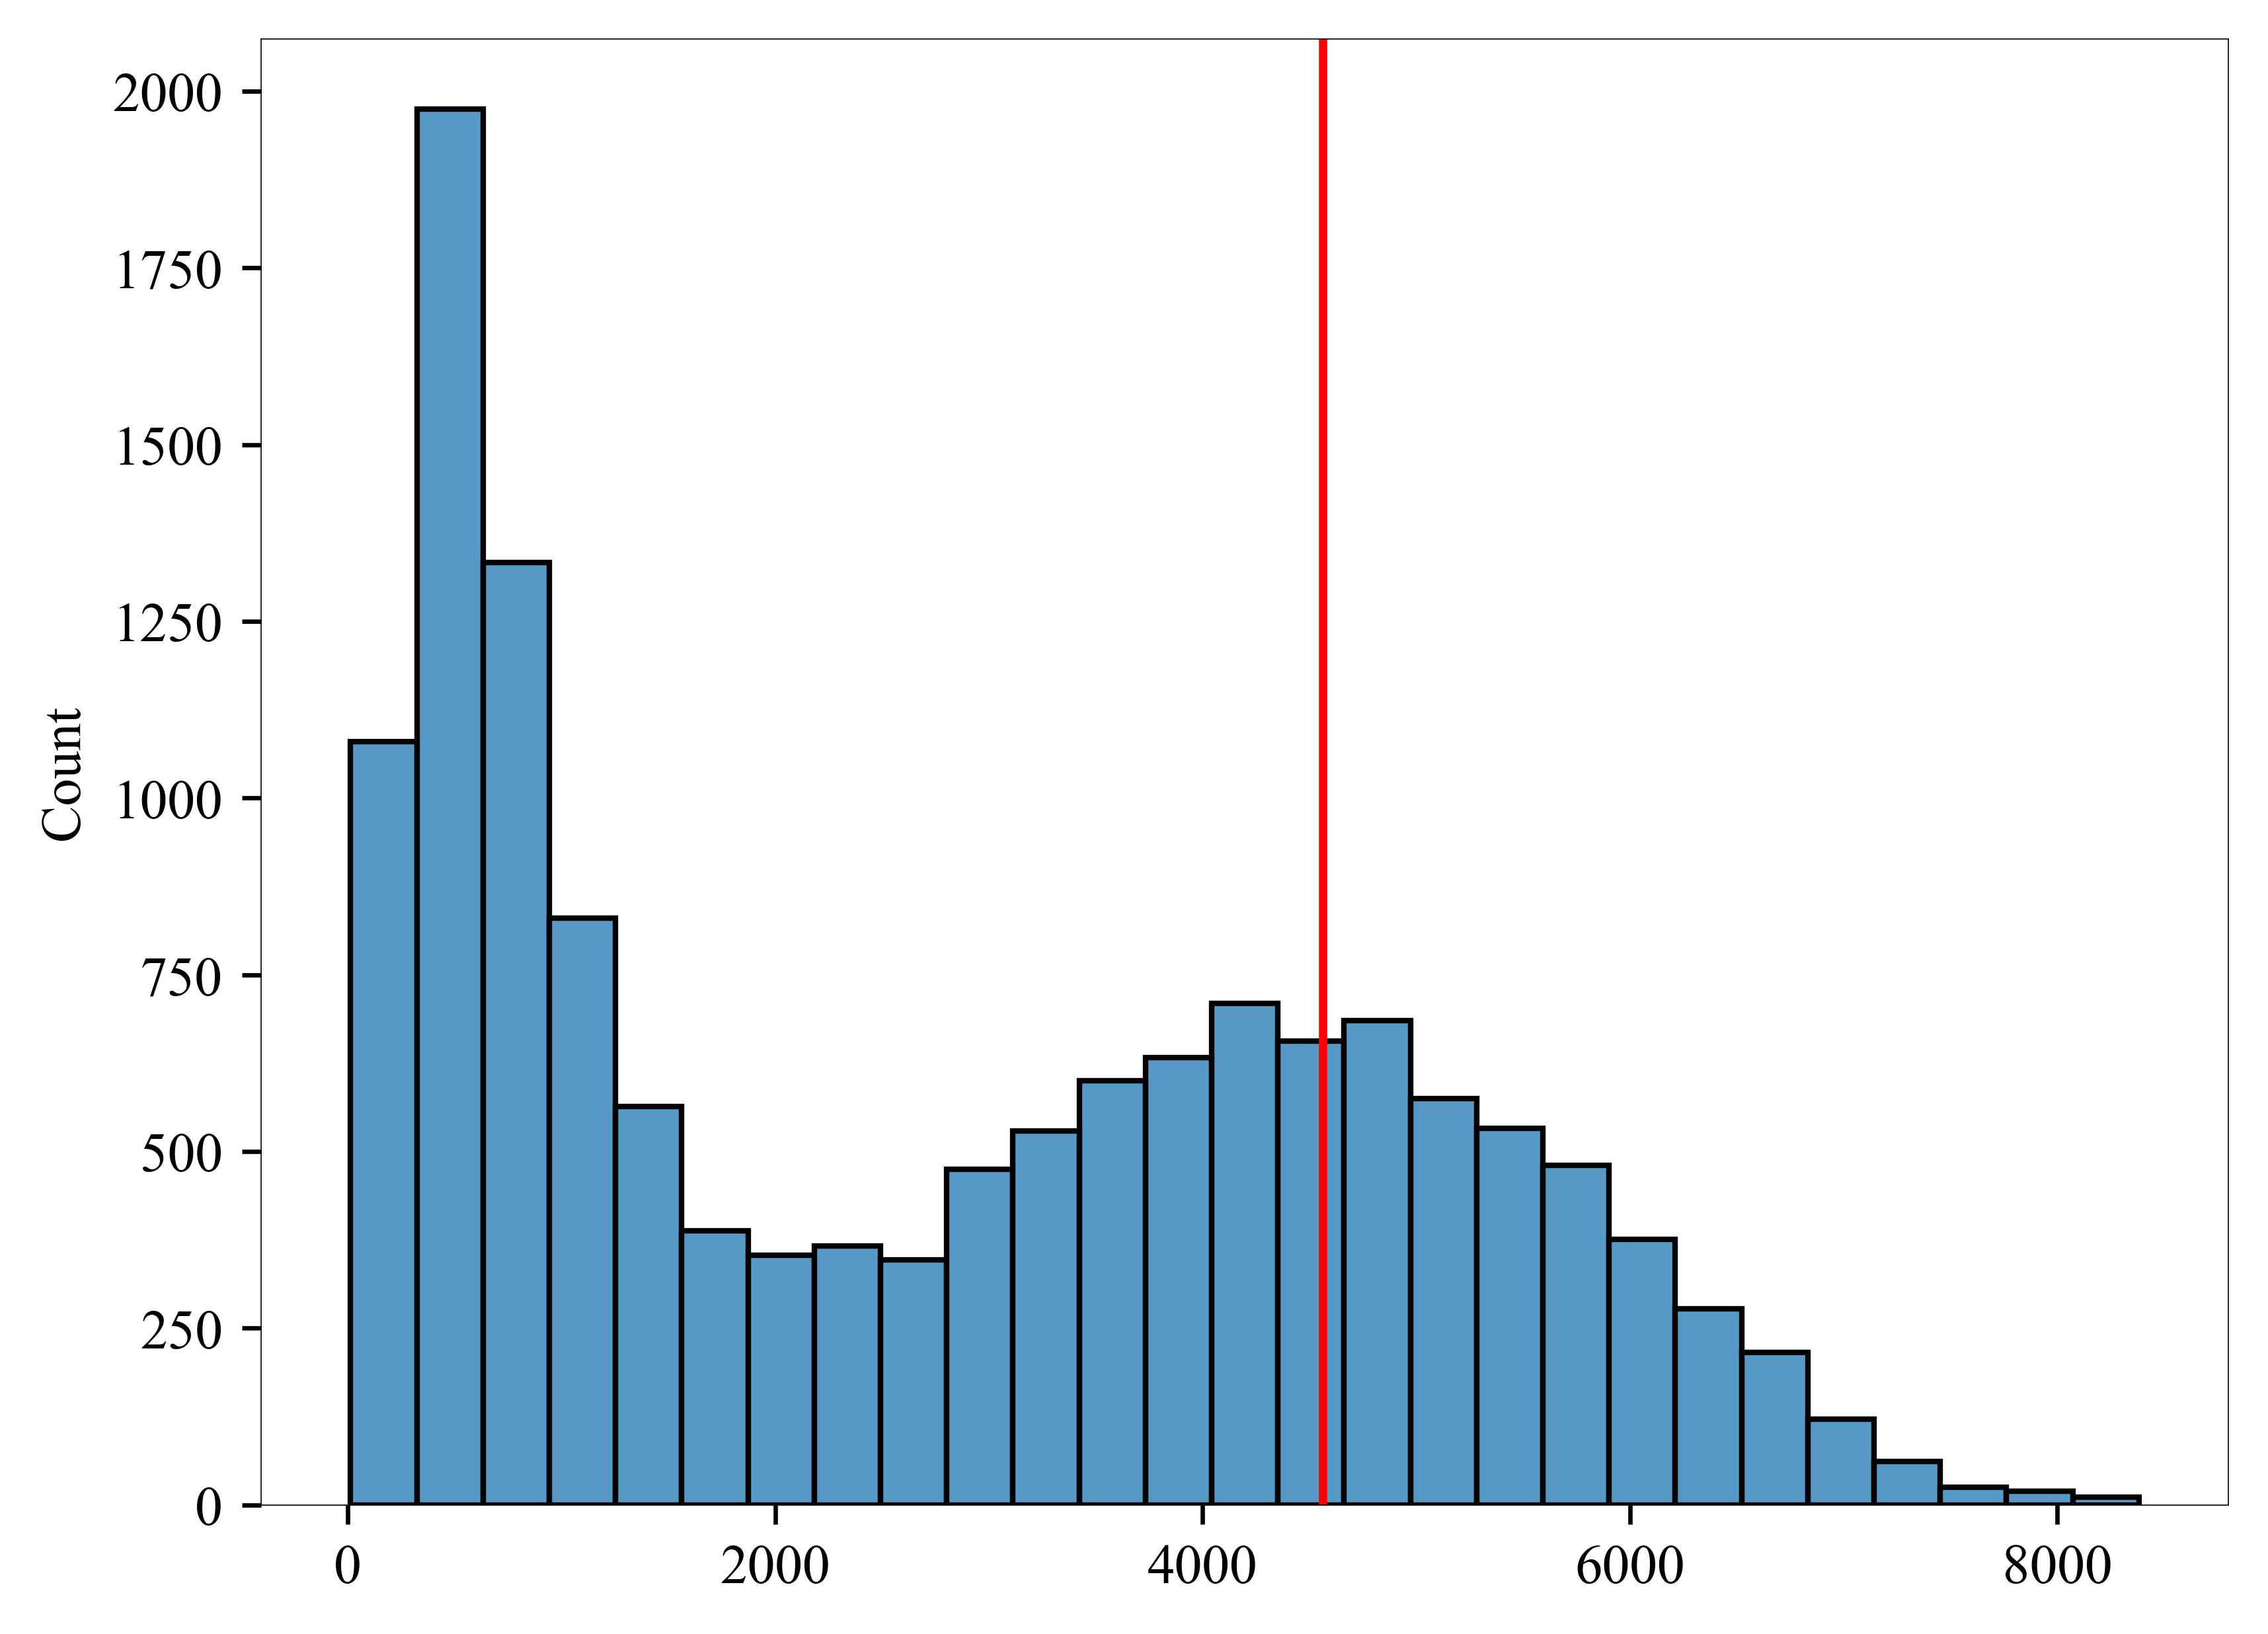

In [52]:
istation = 'Halley'
ivar = 'distance'
ax = sns.histplot(
    pre_weighted_var_icores[expid[i]][istation][ivar]['daily']
)

ax.axvline(
    pre_weighted_var_icores[expid[i]][istation][ivar]['am'],
    c = 'red',
)

# check daily source lat

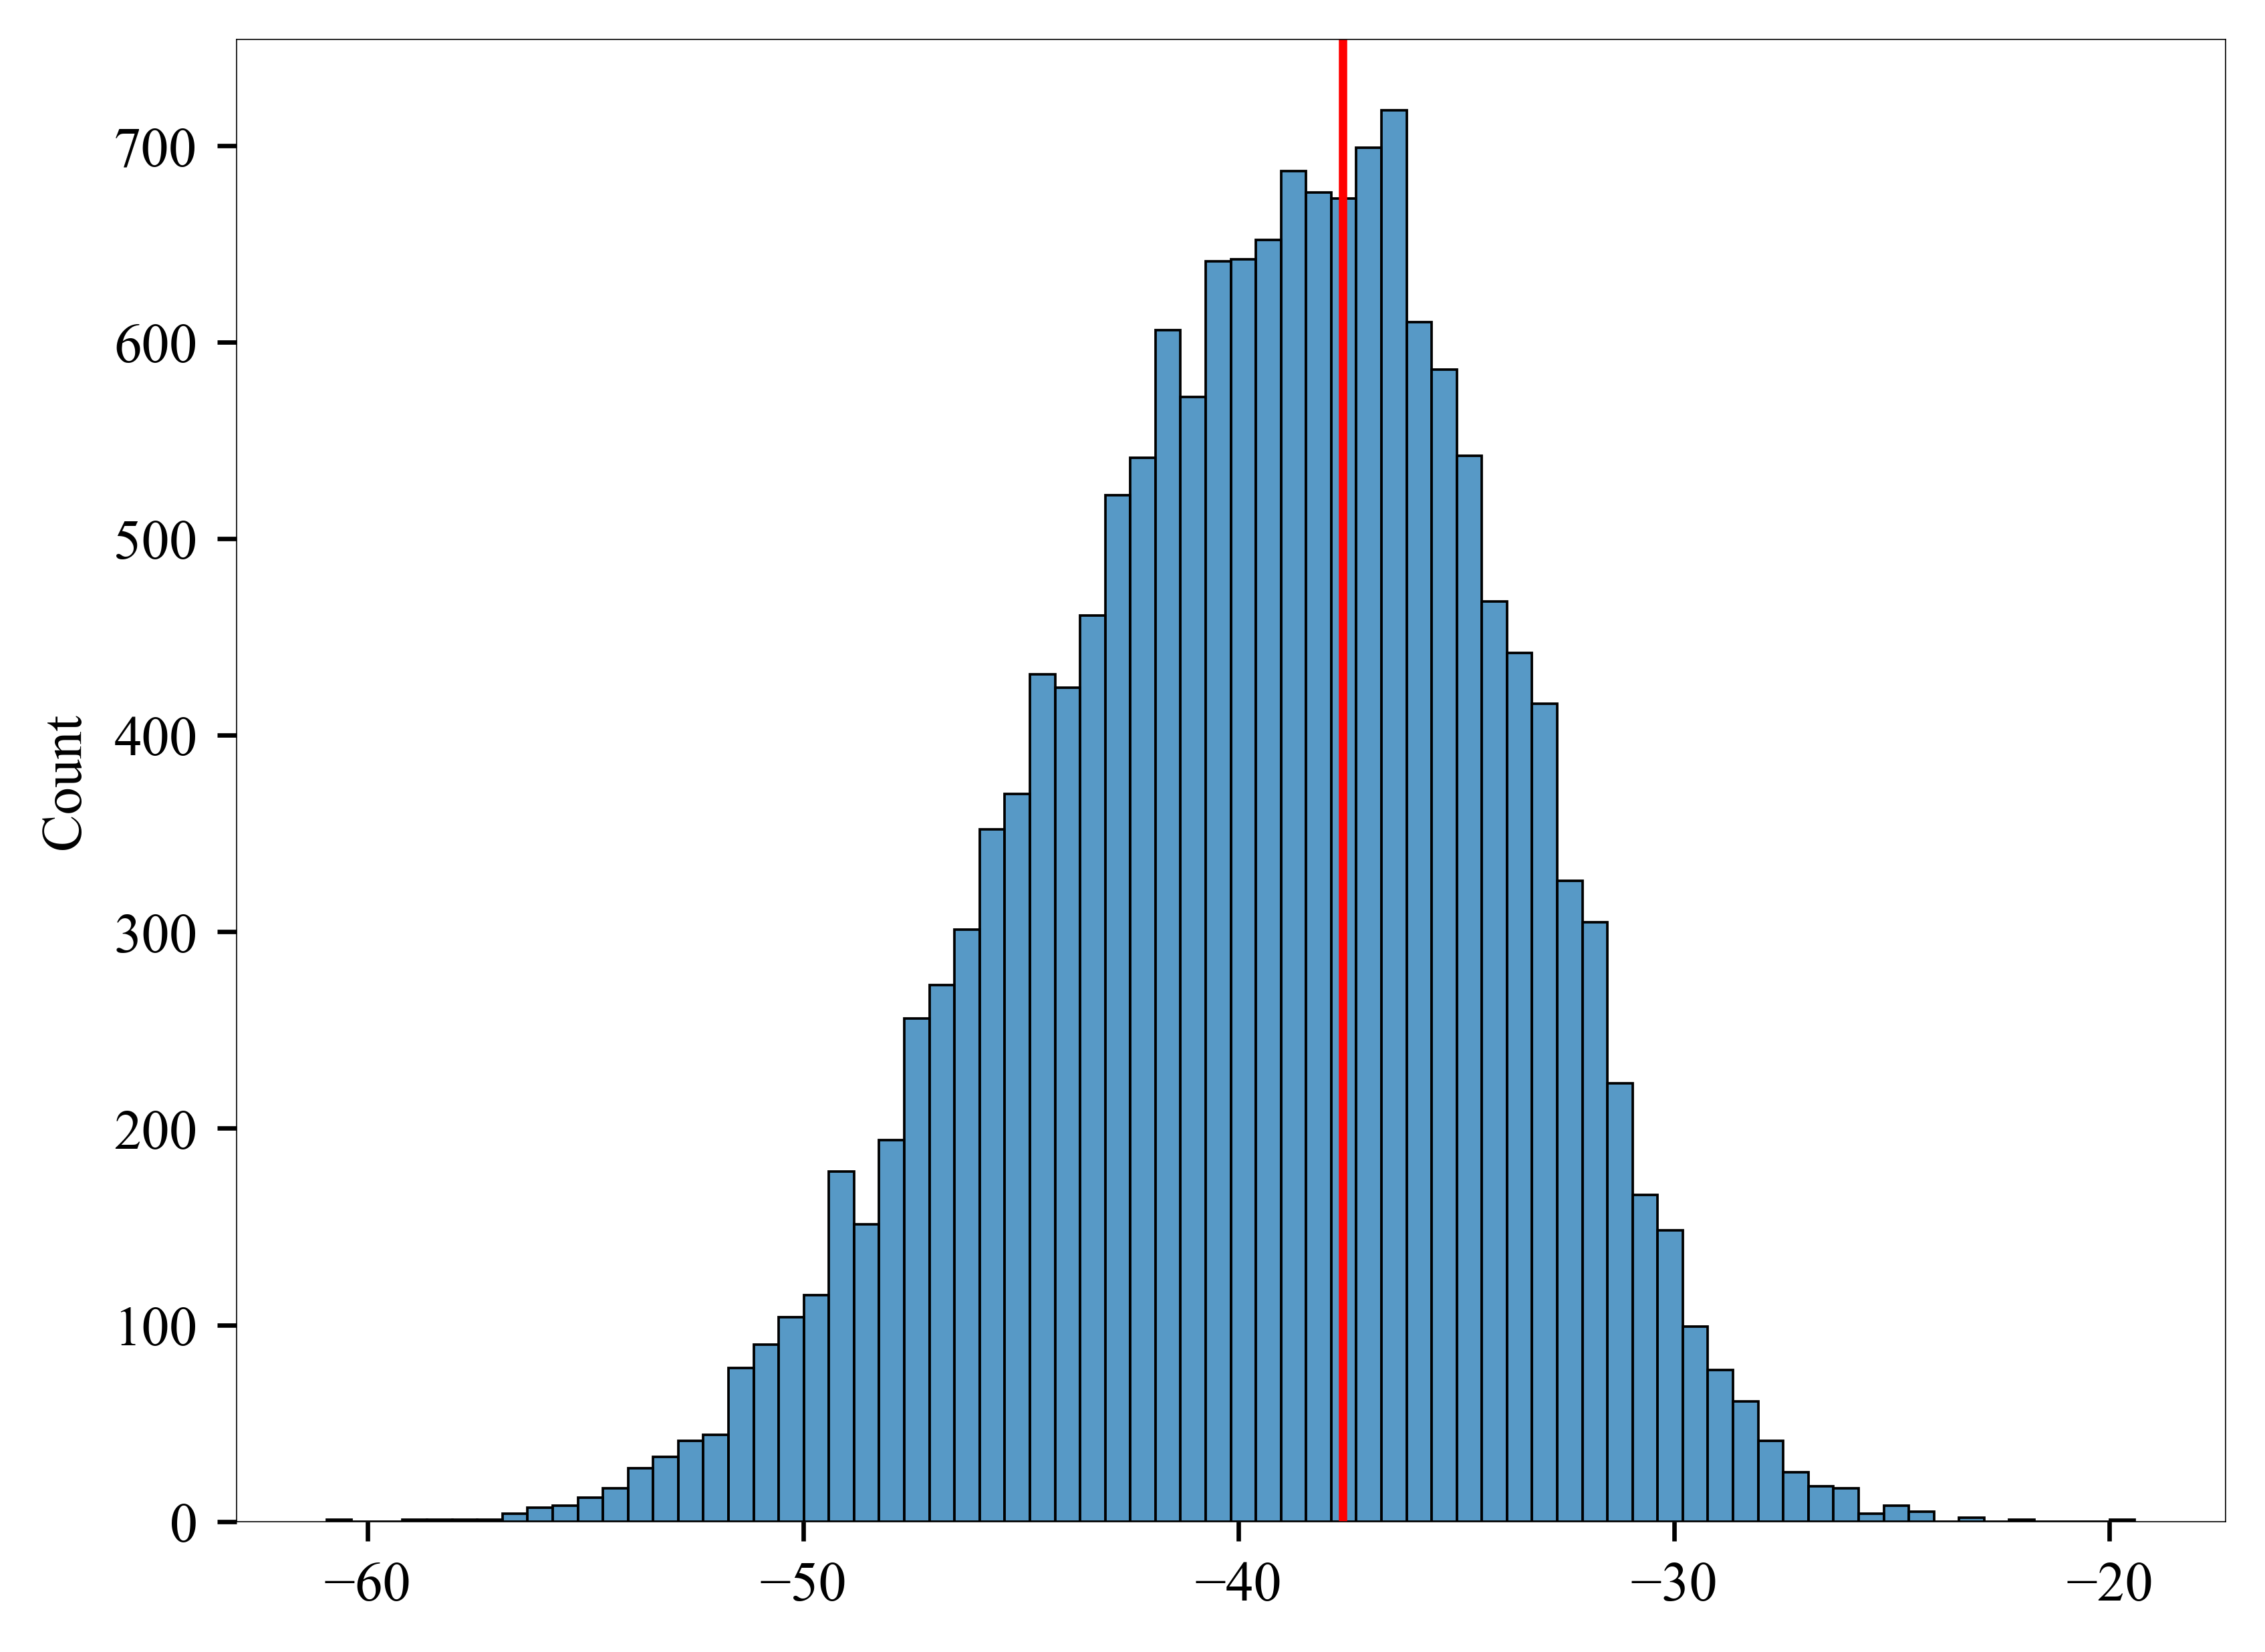

In [55]:
istation = 'EDC'
ivar = 'lat'
ax = sns.histplot(
    pre_weighted_var_icores[expid[i]][istation][ivar]['daily']
)

ax.axvline(
    pre_weighted_var_icores[expid[i]][istation][ivar]['am'],
    c = 'red',
)

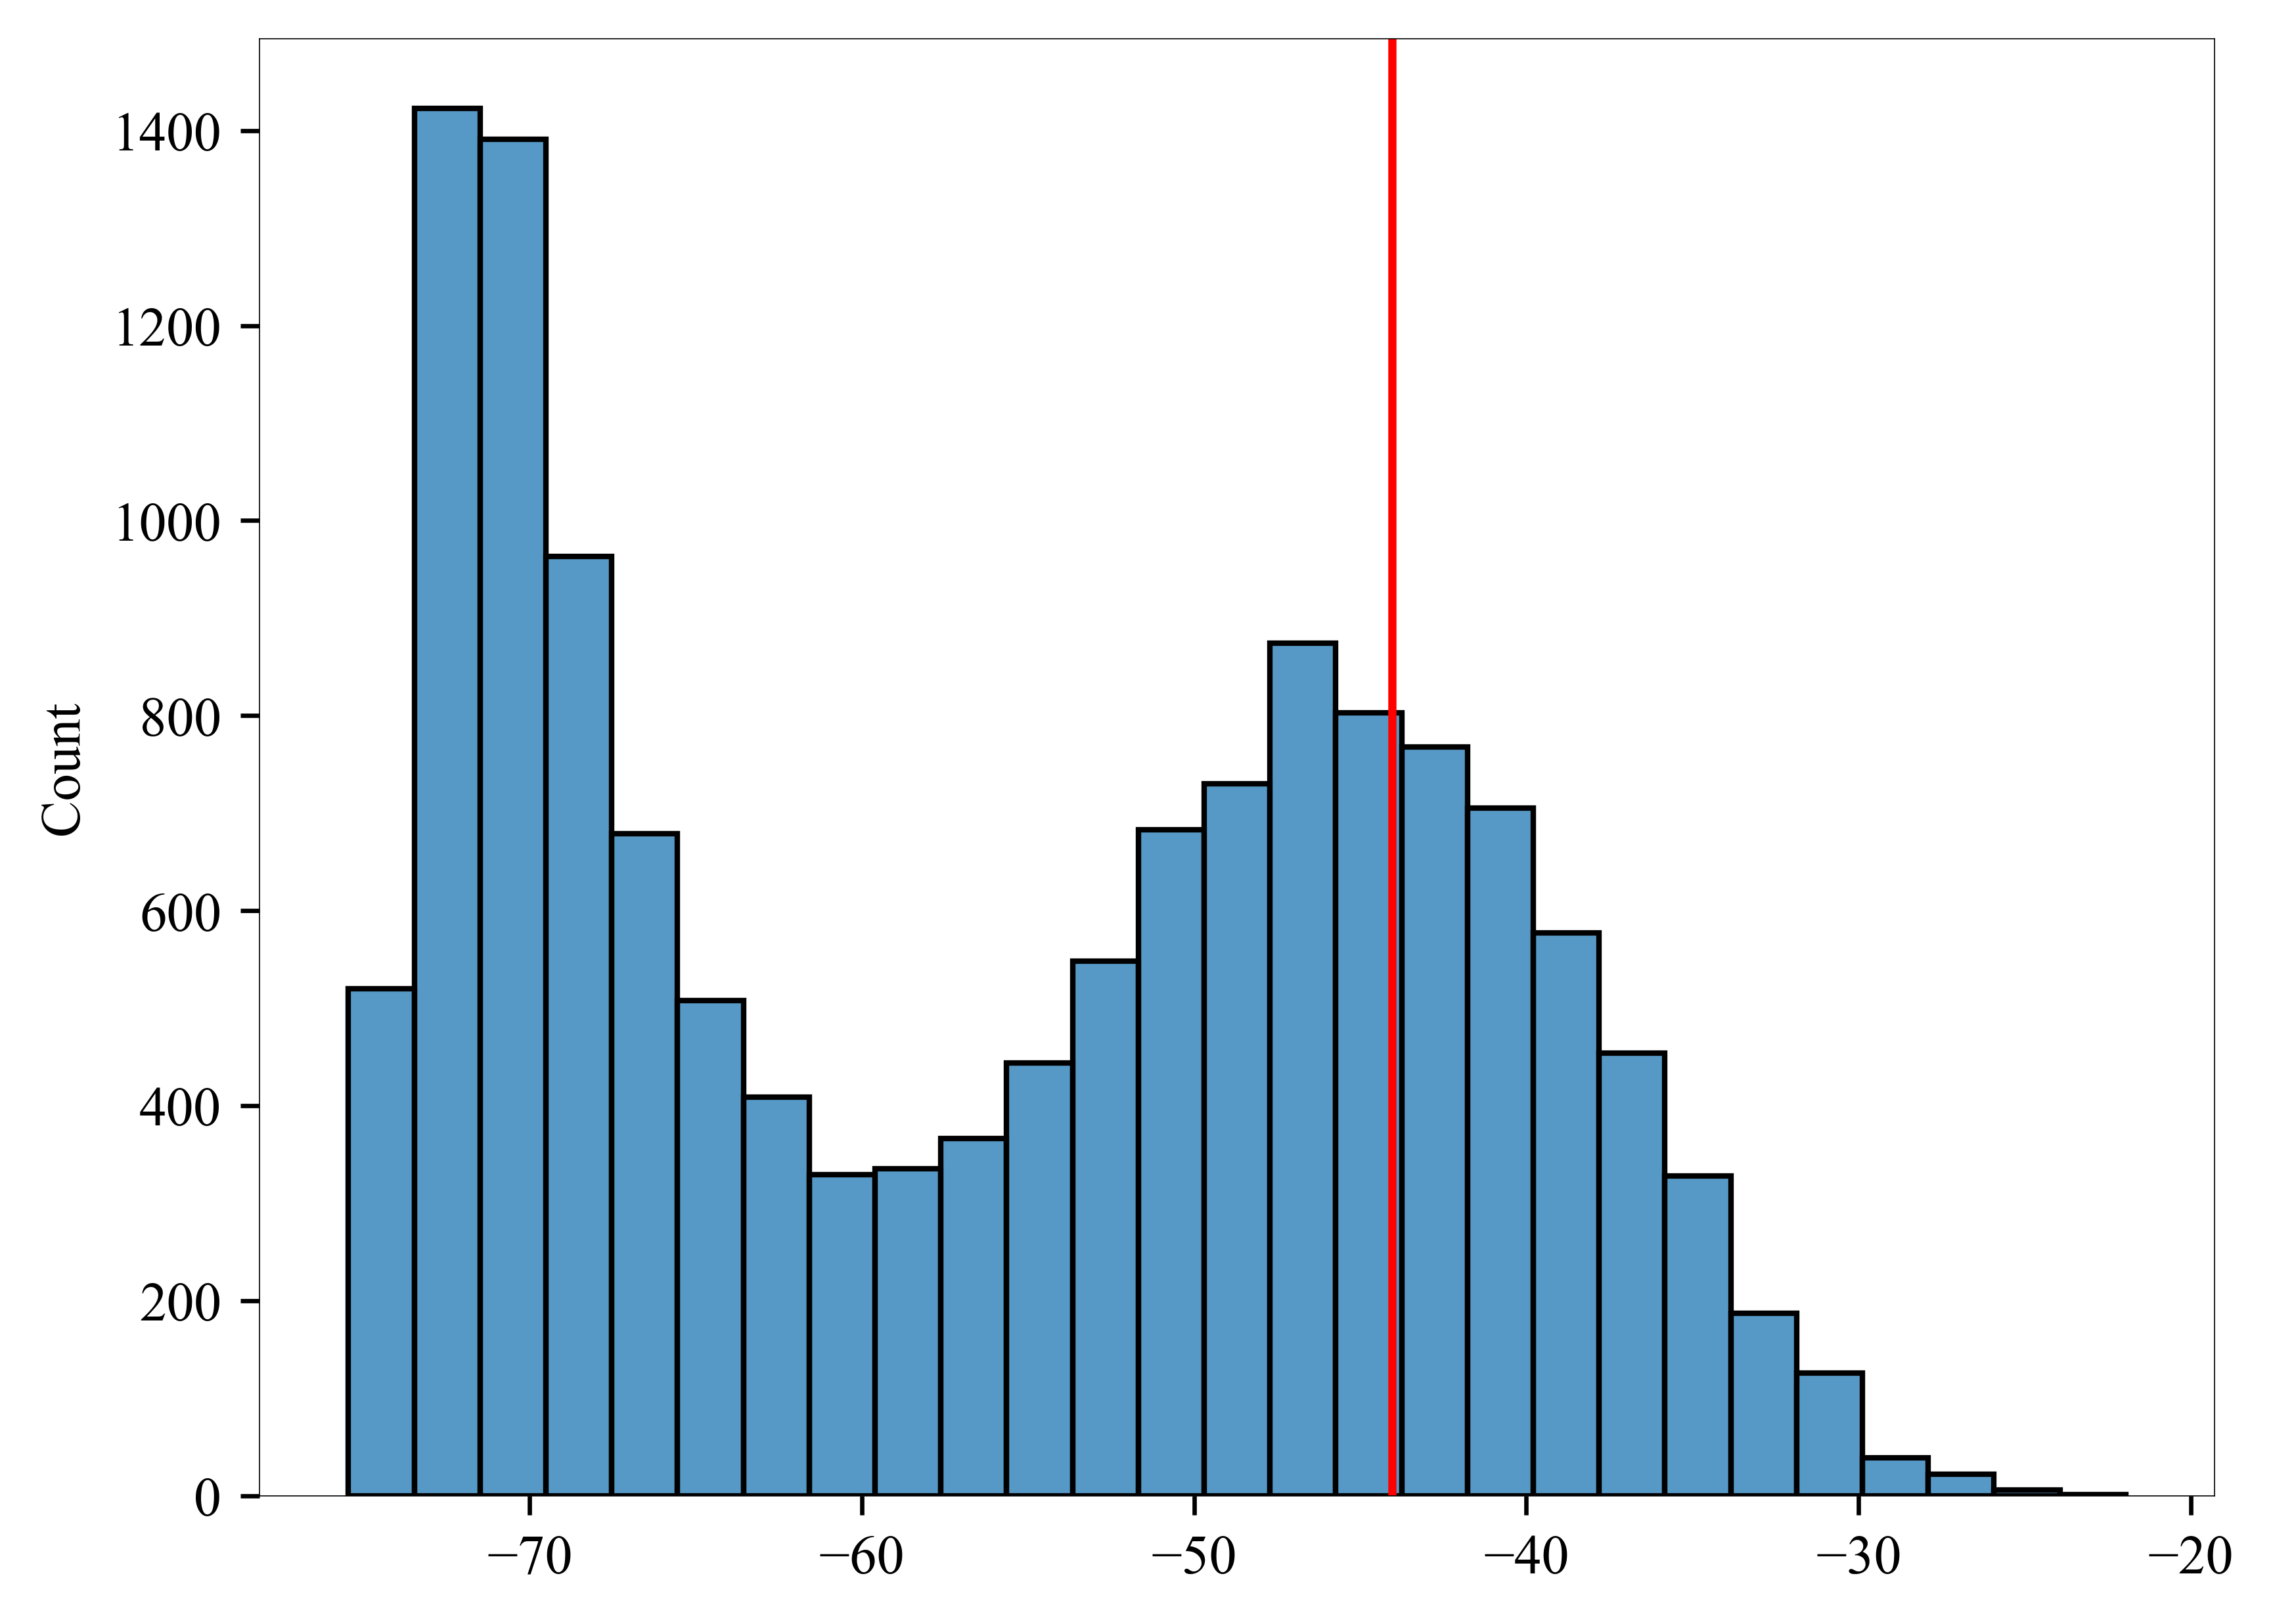

In [56]:
istation = 'Halley'
ivar = 'lat'
ax = sns.histplot(
    pre_weighted_var_icores[expid[i]][istation][ivar]['daily']
)

ax.axvline(
    pre_weighted_var_icores[expid[i]][istation][ivar]['am'],
    c = 'red',
)

# check daily source lon

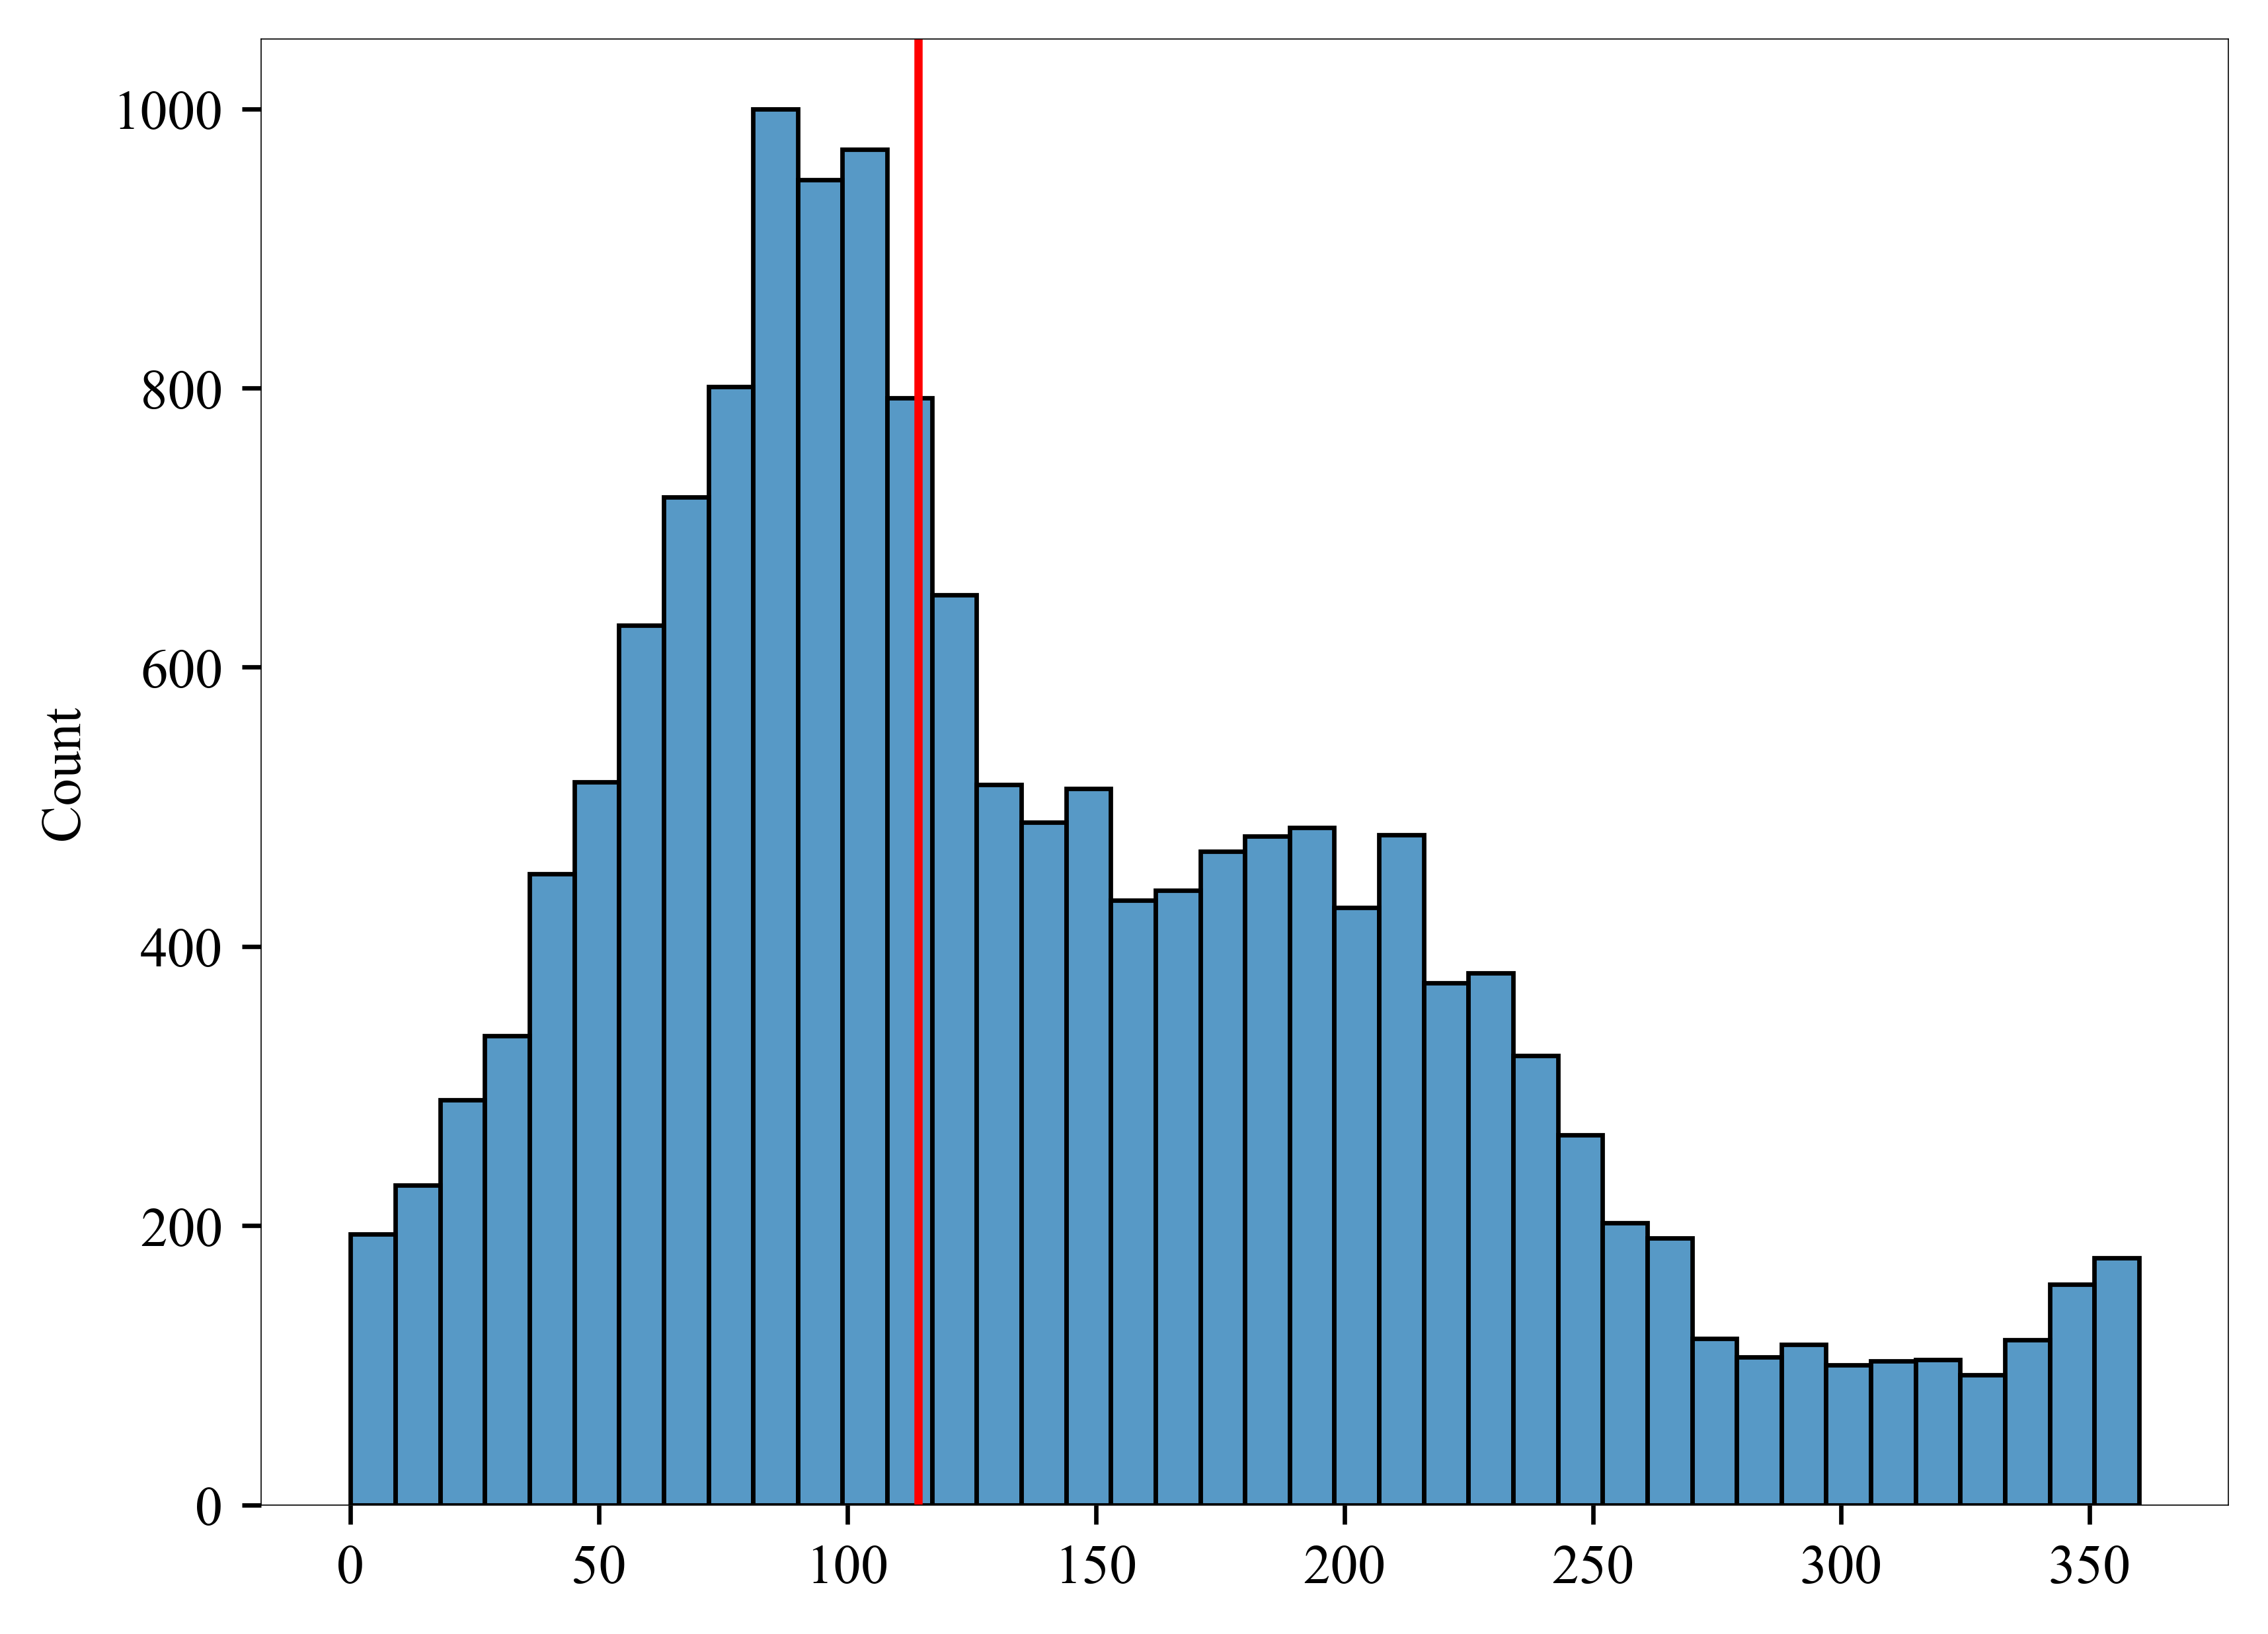

In [59]:
istation = 'EDC'
ivar = 'lon'
ax = sns.histplot(
    pre_weighted_var_icores[expid[i]][istation][ivar]['daily']
)

ax.axvline(
    pre_weighted_var_icores[expid[i]][istation][ivar]['am'],
    c = 'red',
)

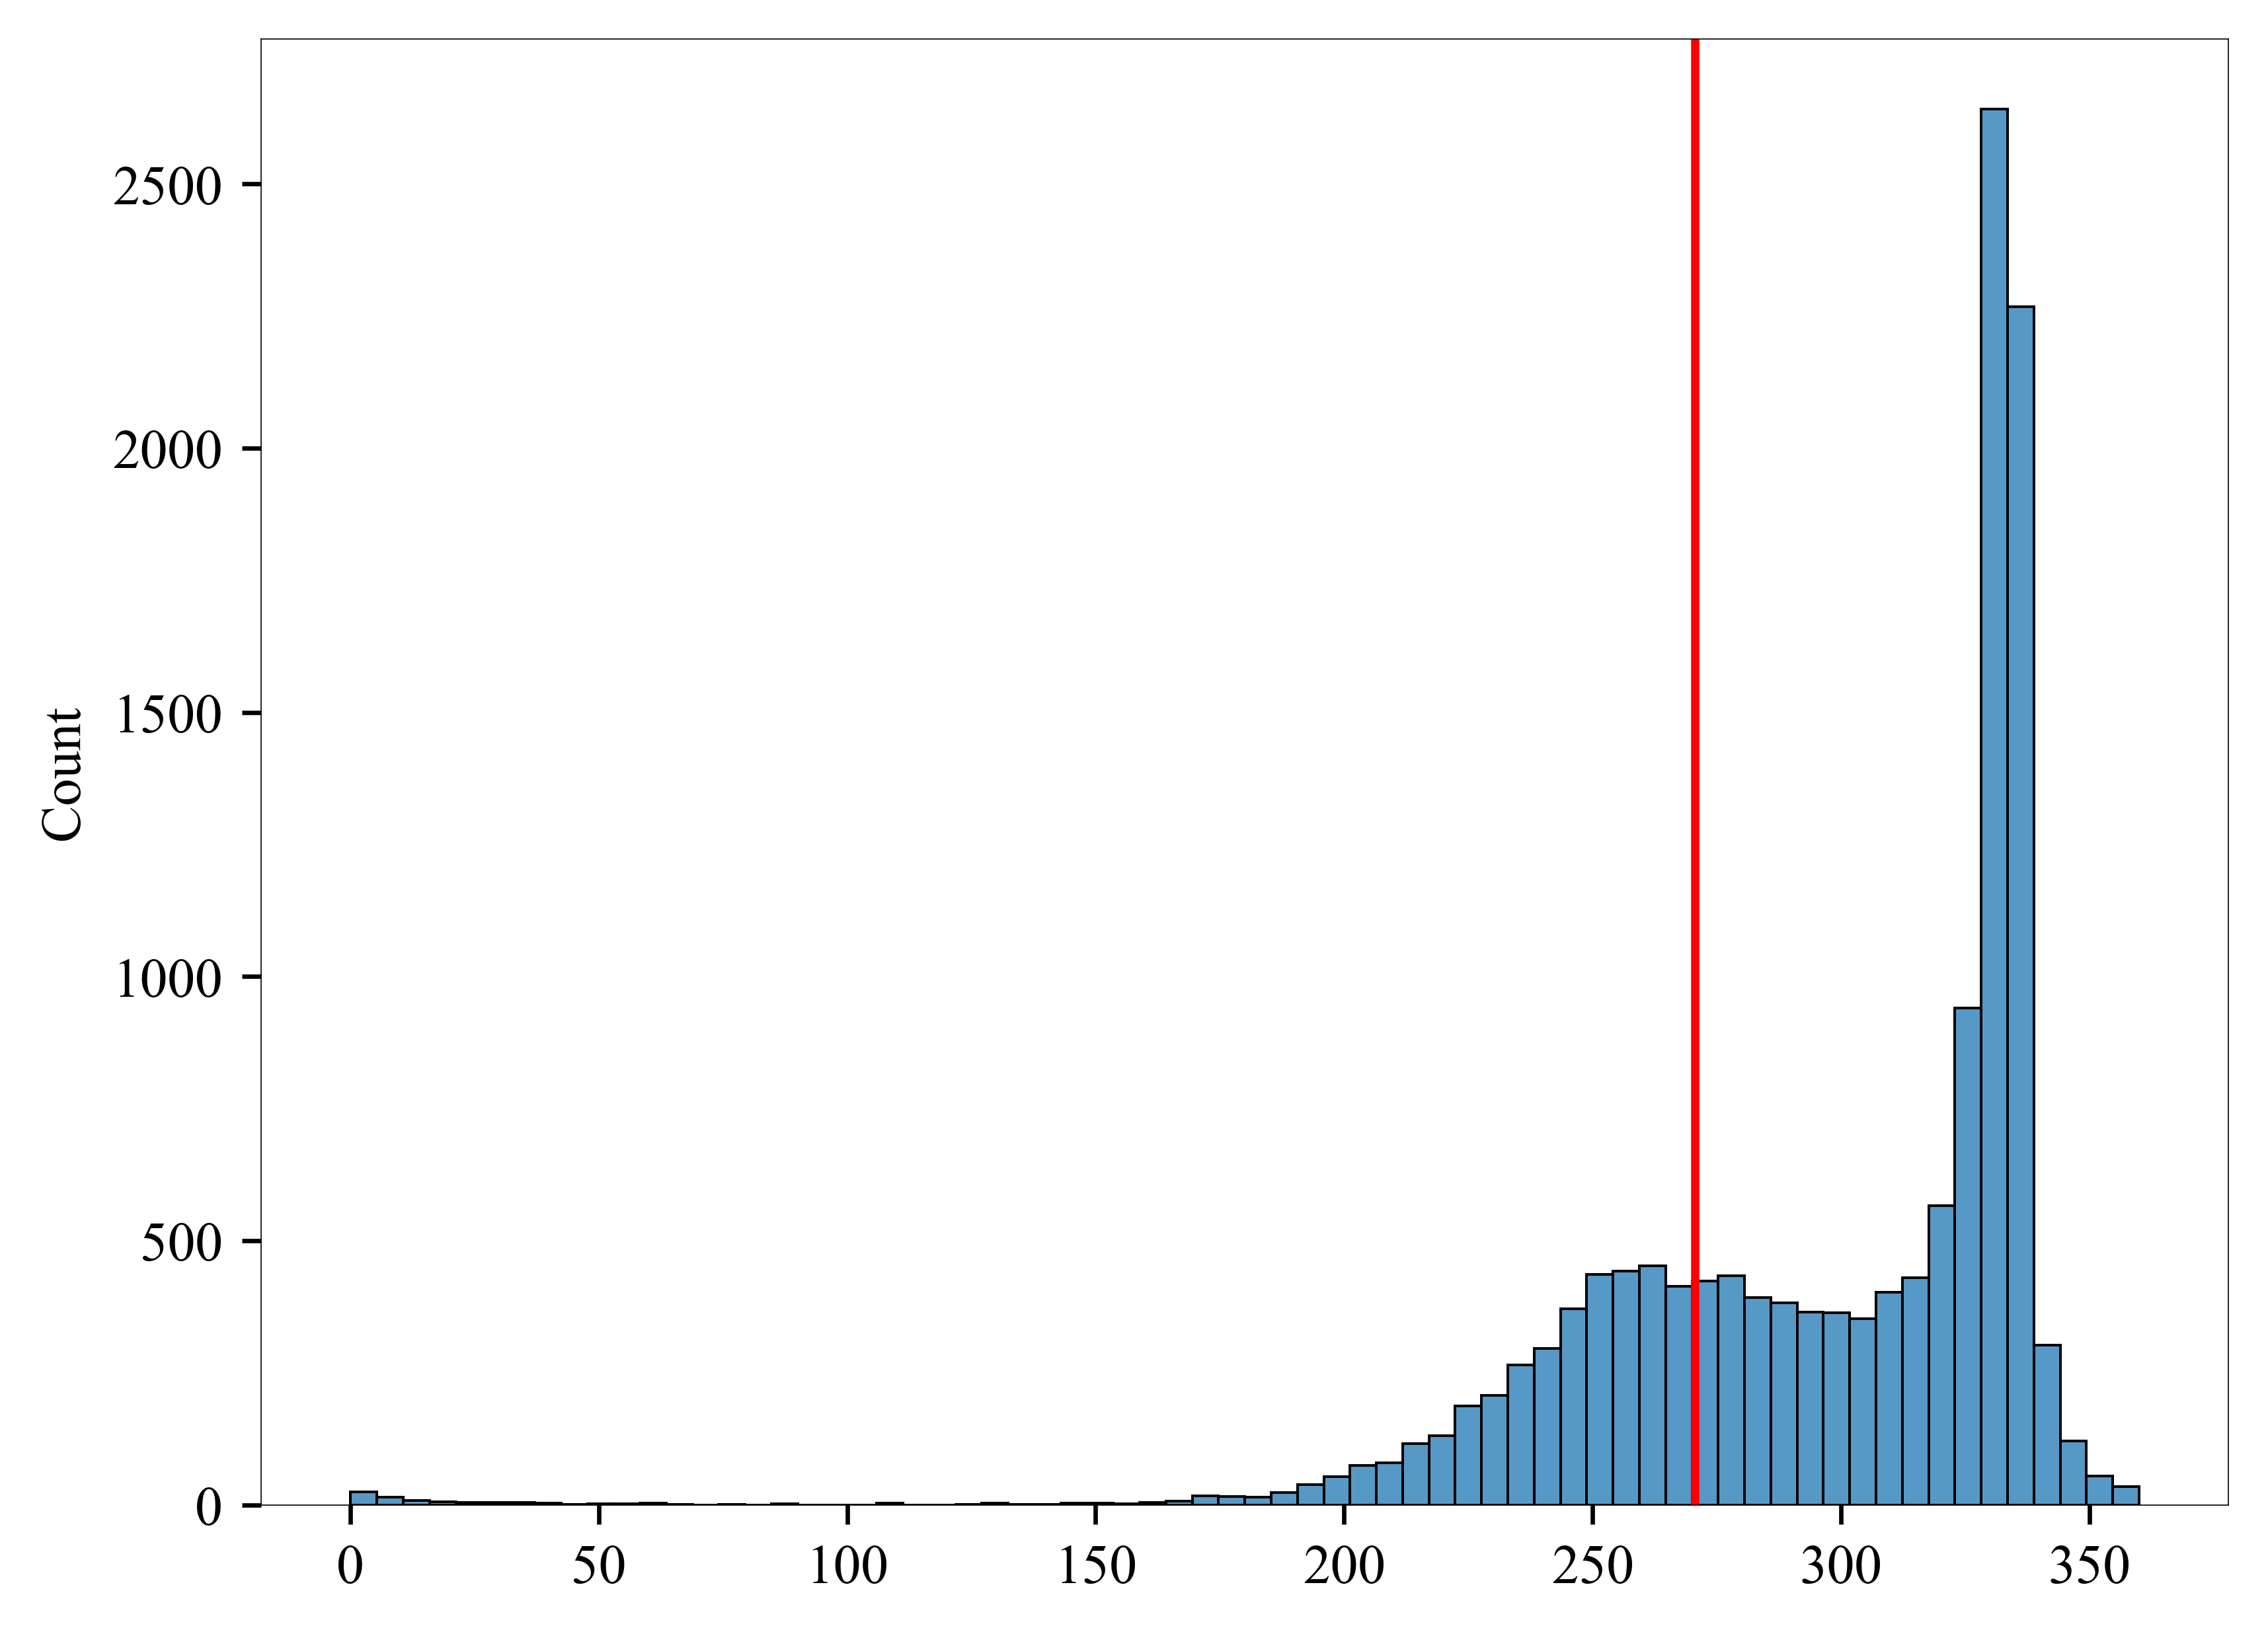

In [60]:
istation = 'Halley'
ivar = 'lon'
ax = sns.histplot(
    pre_weighted_var_icores[expid[i]][istation][ivar]['daily']
)

ax.axvline(
    pre_weighted_var_icores[expid[i]][istation][ivar]['am'],
    c = 'red',
)

# check daily wind10

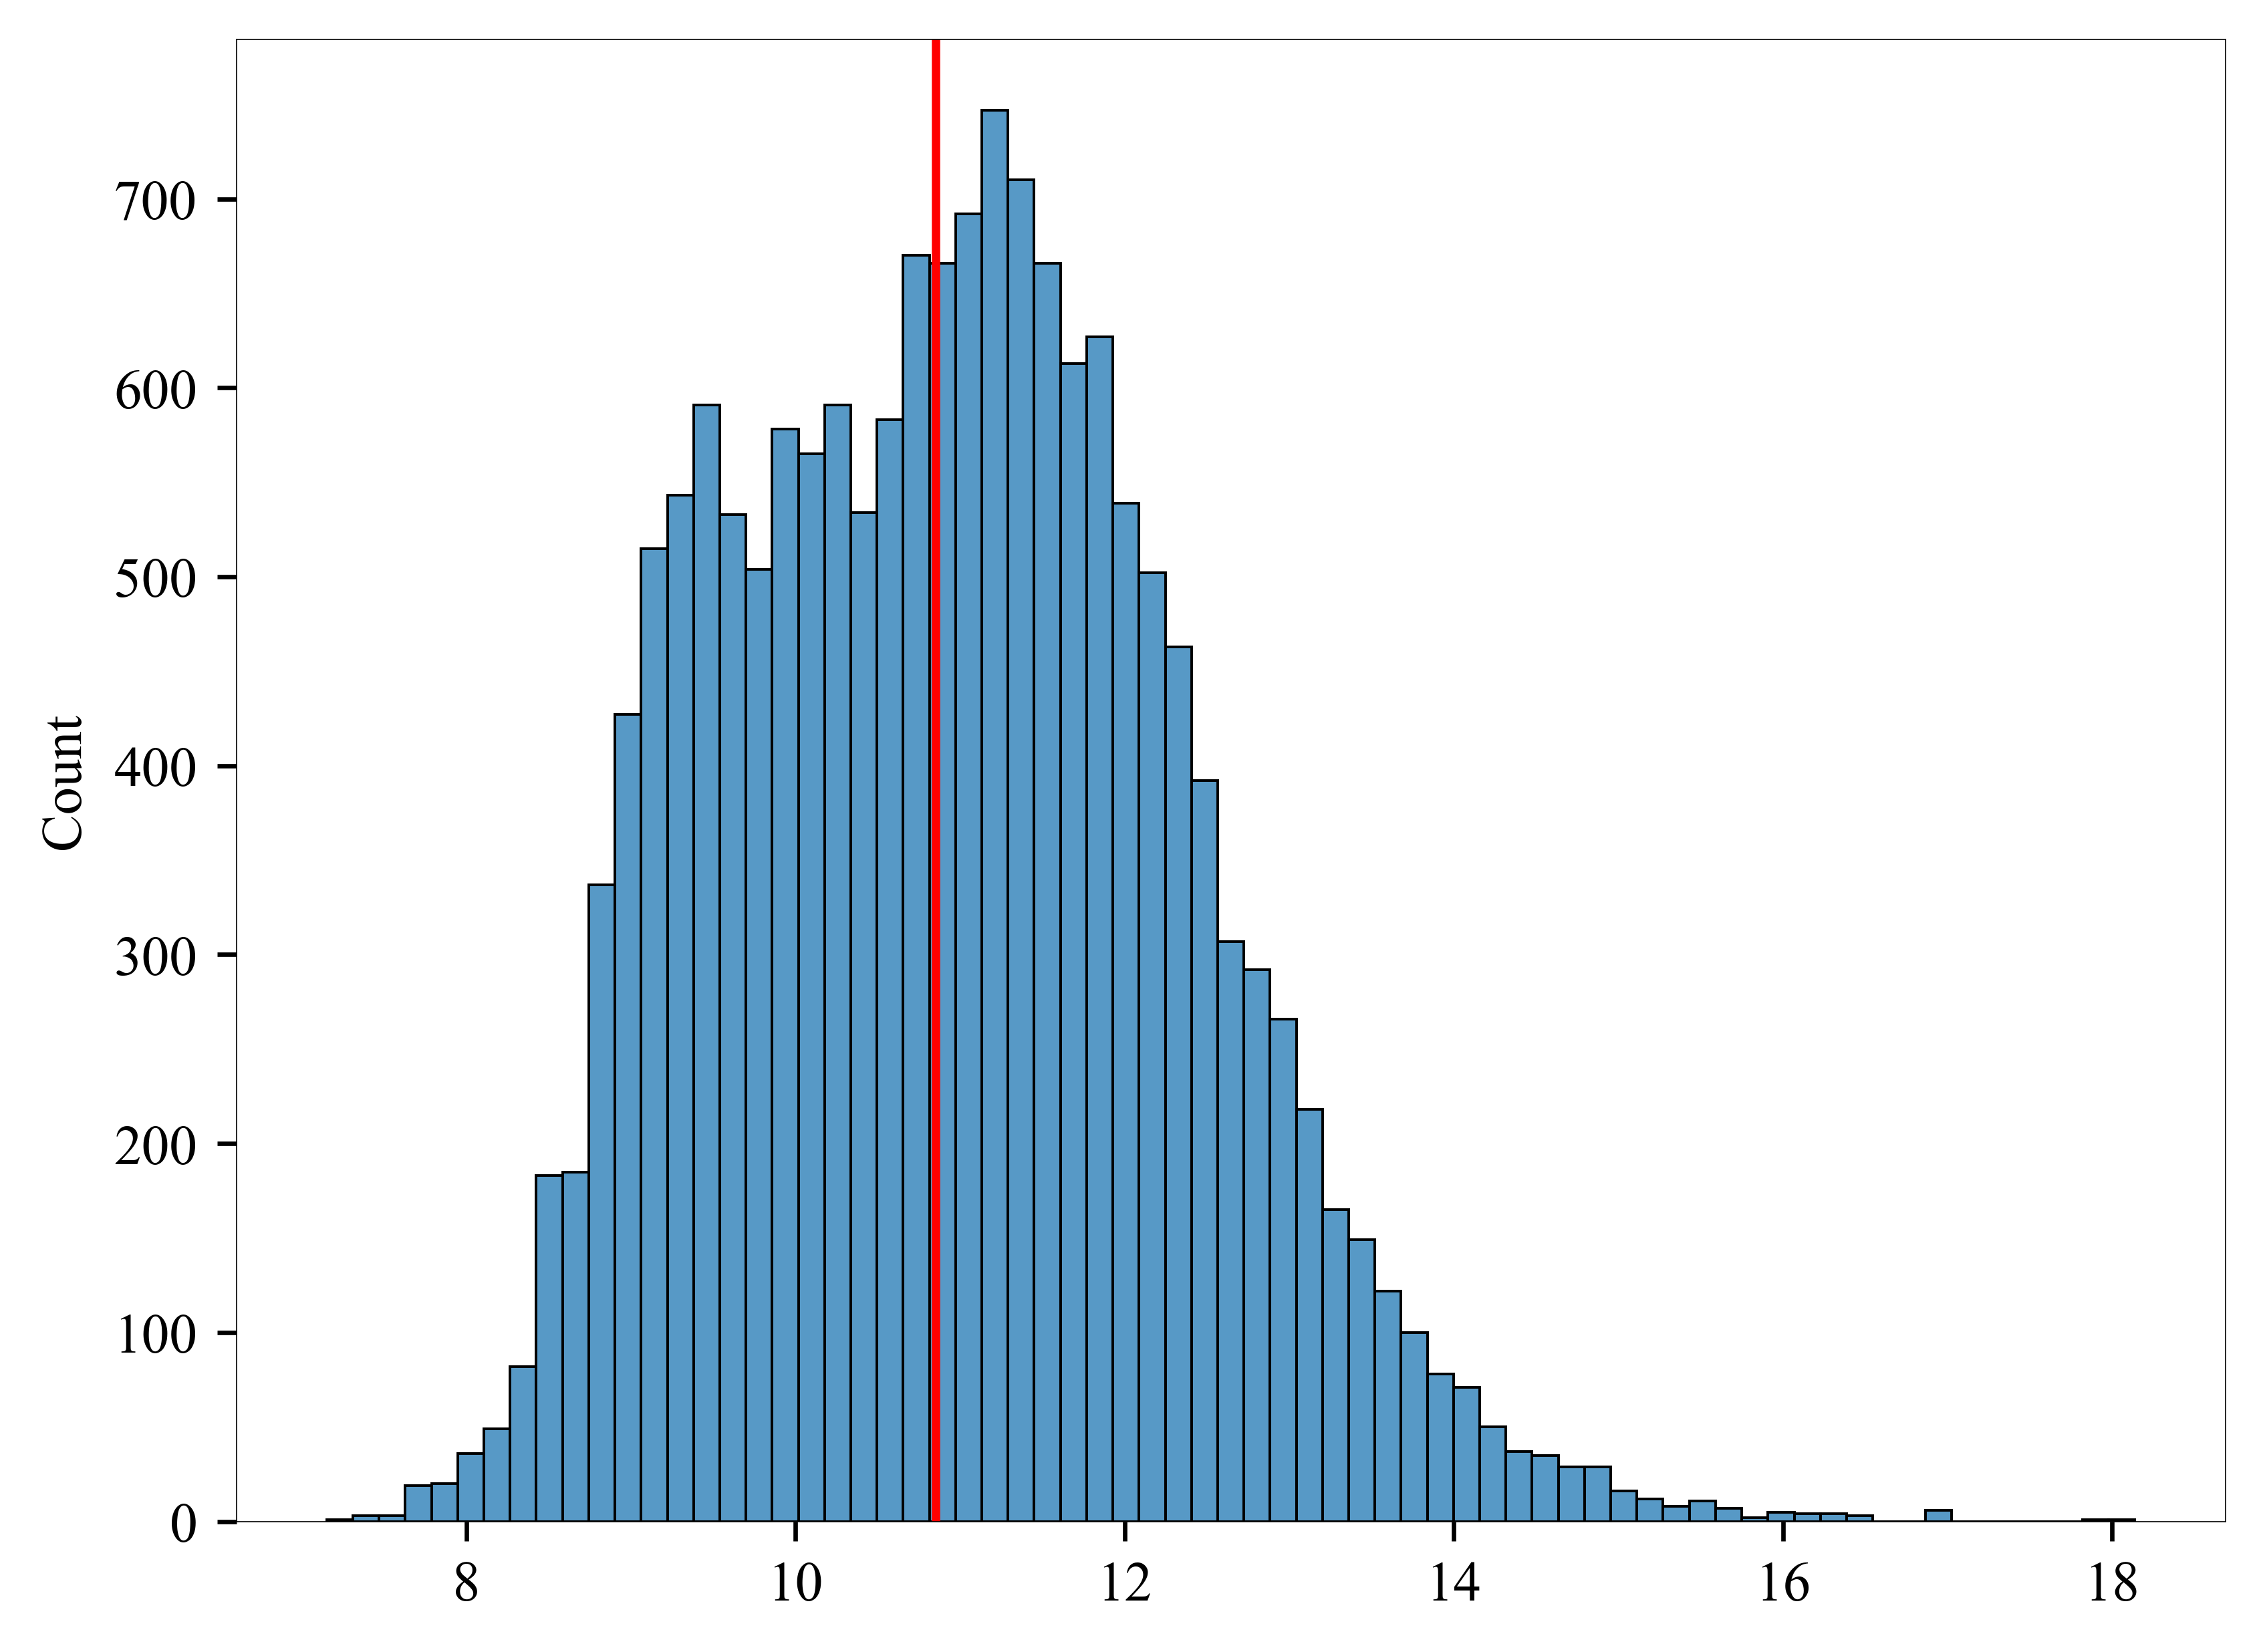

In [62]:
istation = 'EDC'
ivar = 'wind10'
ax = sns.histplot(
    pre_weighted_var_icores[expid[i]][istation][ivar]['daily']
)

ax.axvline(
    pre_weighted_var_icores[expid[i]][istation][ivar]['am'],
    c = 'red',
)

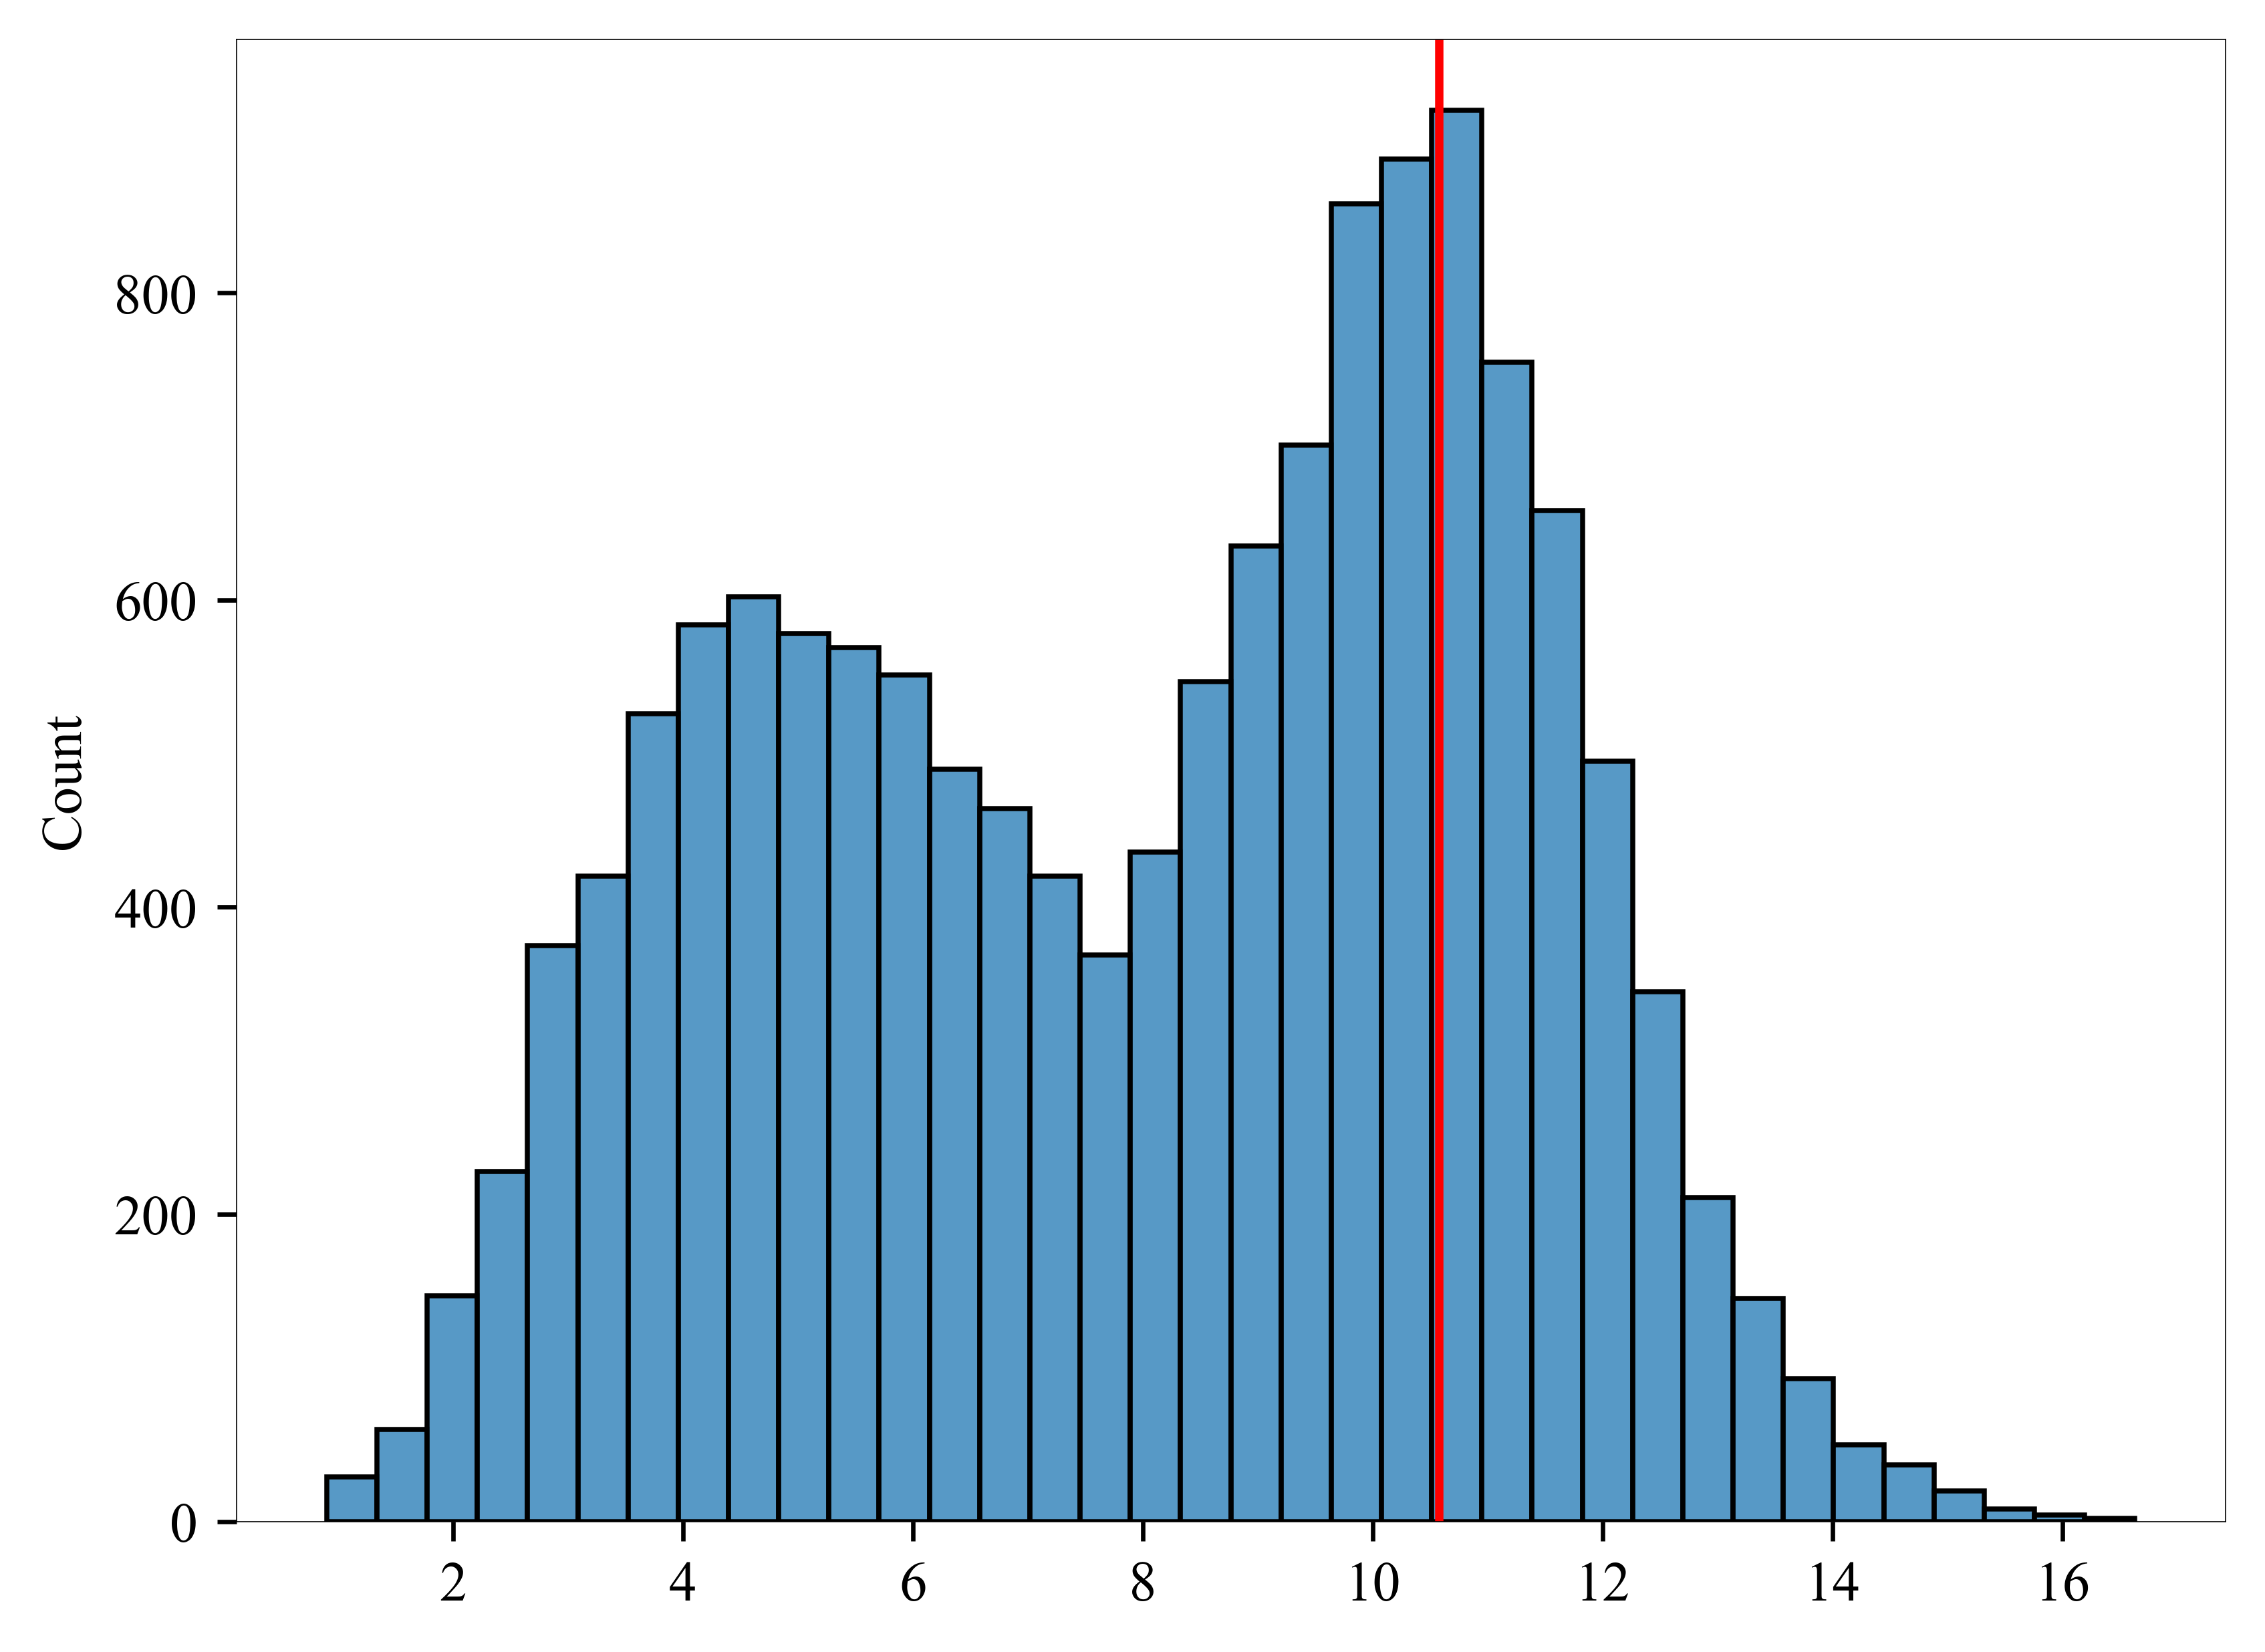

In [63]:
istation = 'Halley'
ivar = 'wind10'
ax = sns.histplot(
    pre_weighted_var_icores[expid[i]][istation][ivar]['daily']
)

ax.axvline(
    pre_weighted_var_icores[expid[i]][istation][ivar]['am'],
    c = 'red',
)

# check daily sst

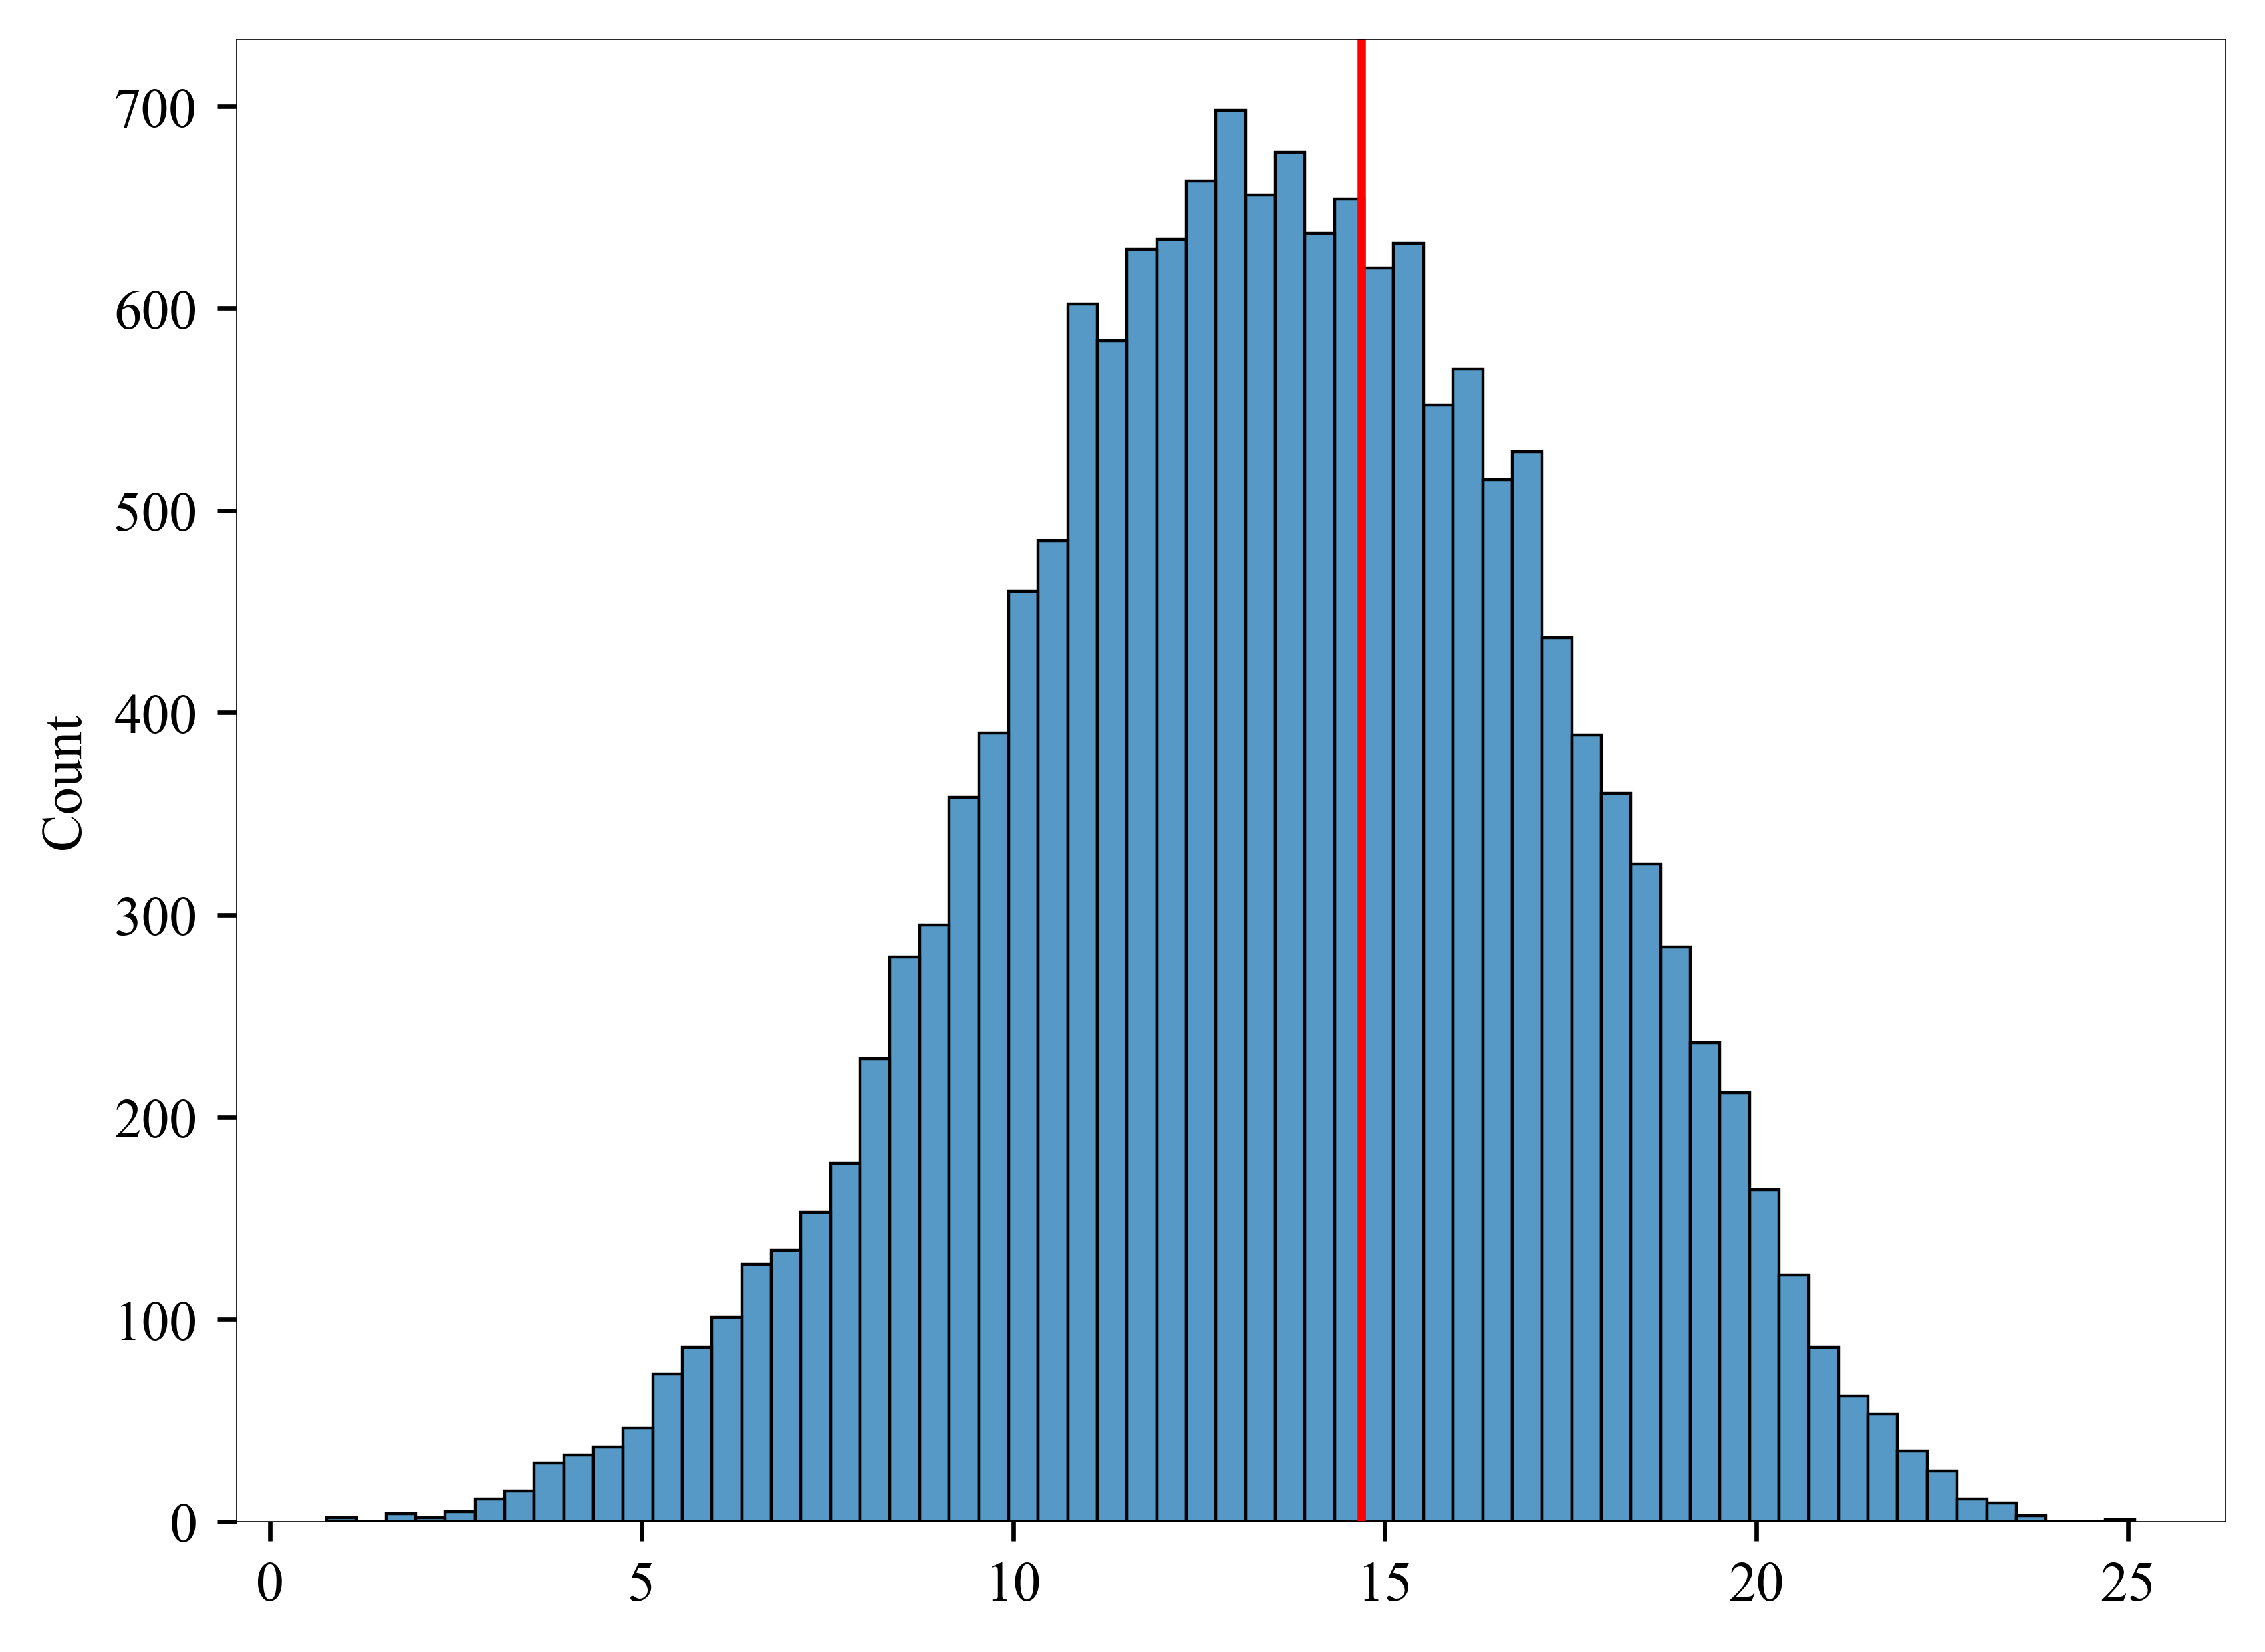

In [5]:
istation = 'EDC'
ivar = 'sst'
ax = sns.histplot(
    pre_weighted_var_icores[expid[i]][istation][ivar]['daily']
)

ax.axvline(
    pre_weighted_var_icores[expid[i]][istation][ivar]['am'],
    c = 'red',
)

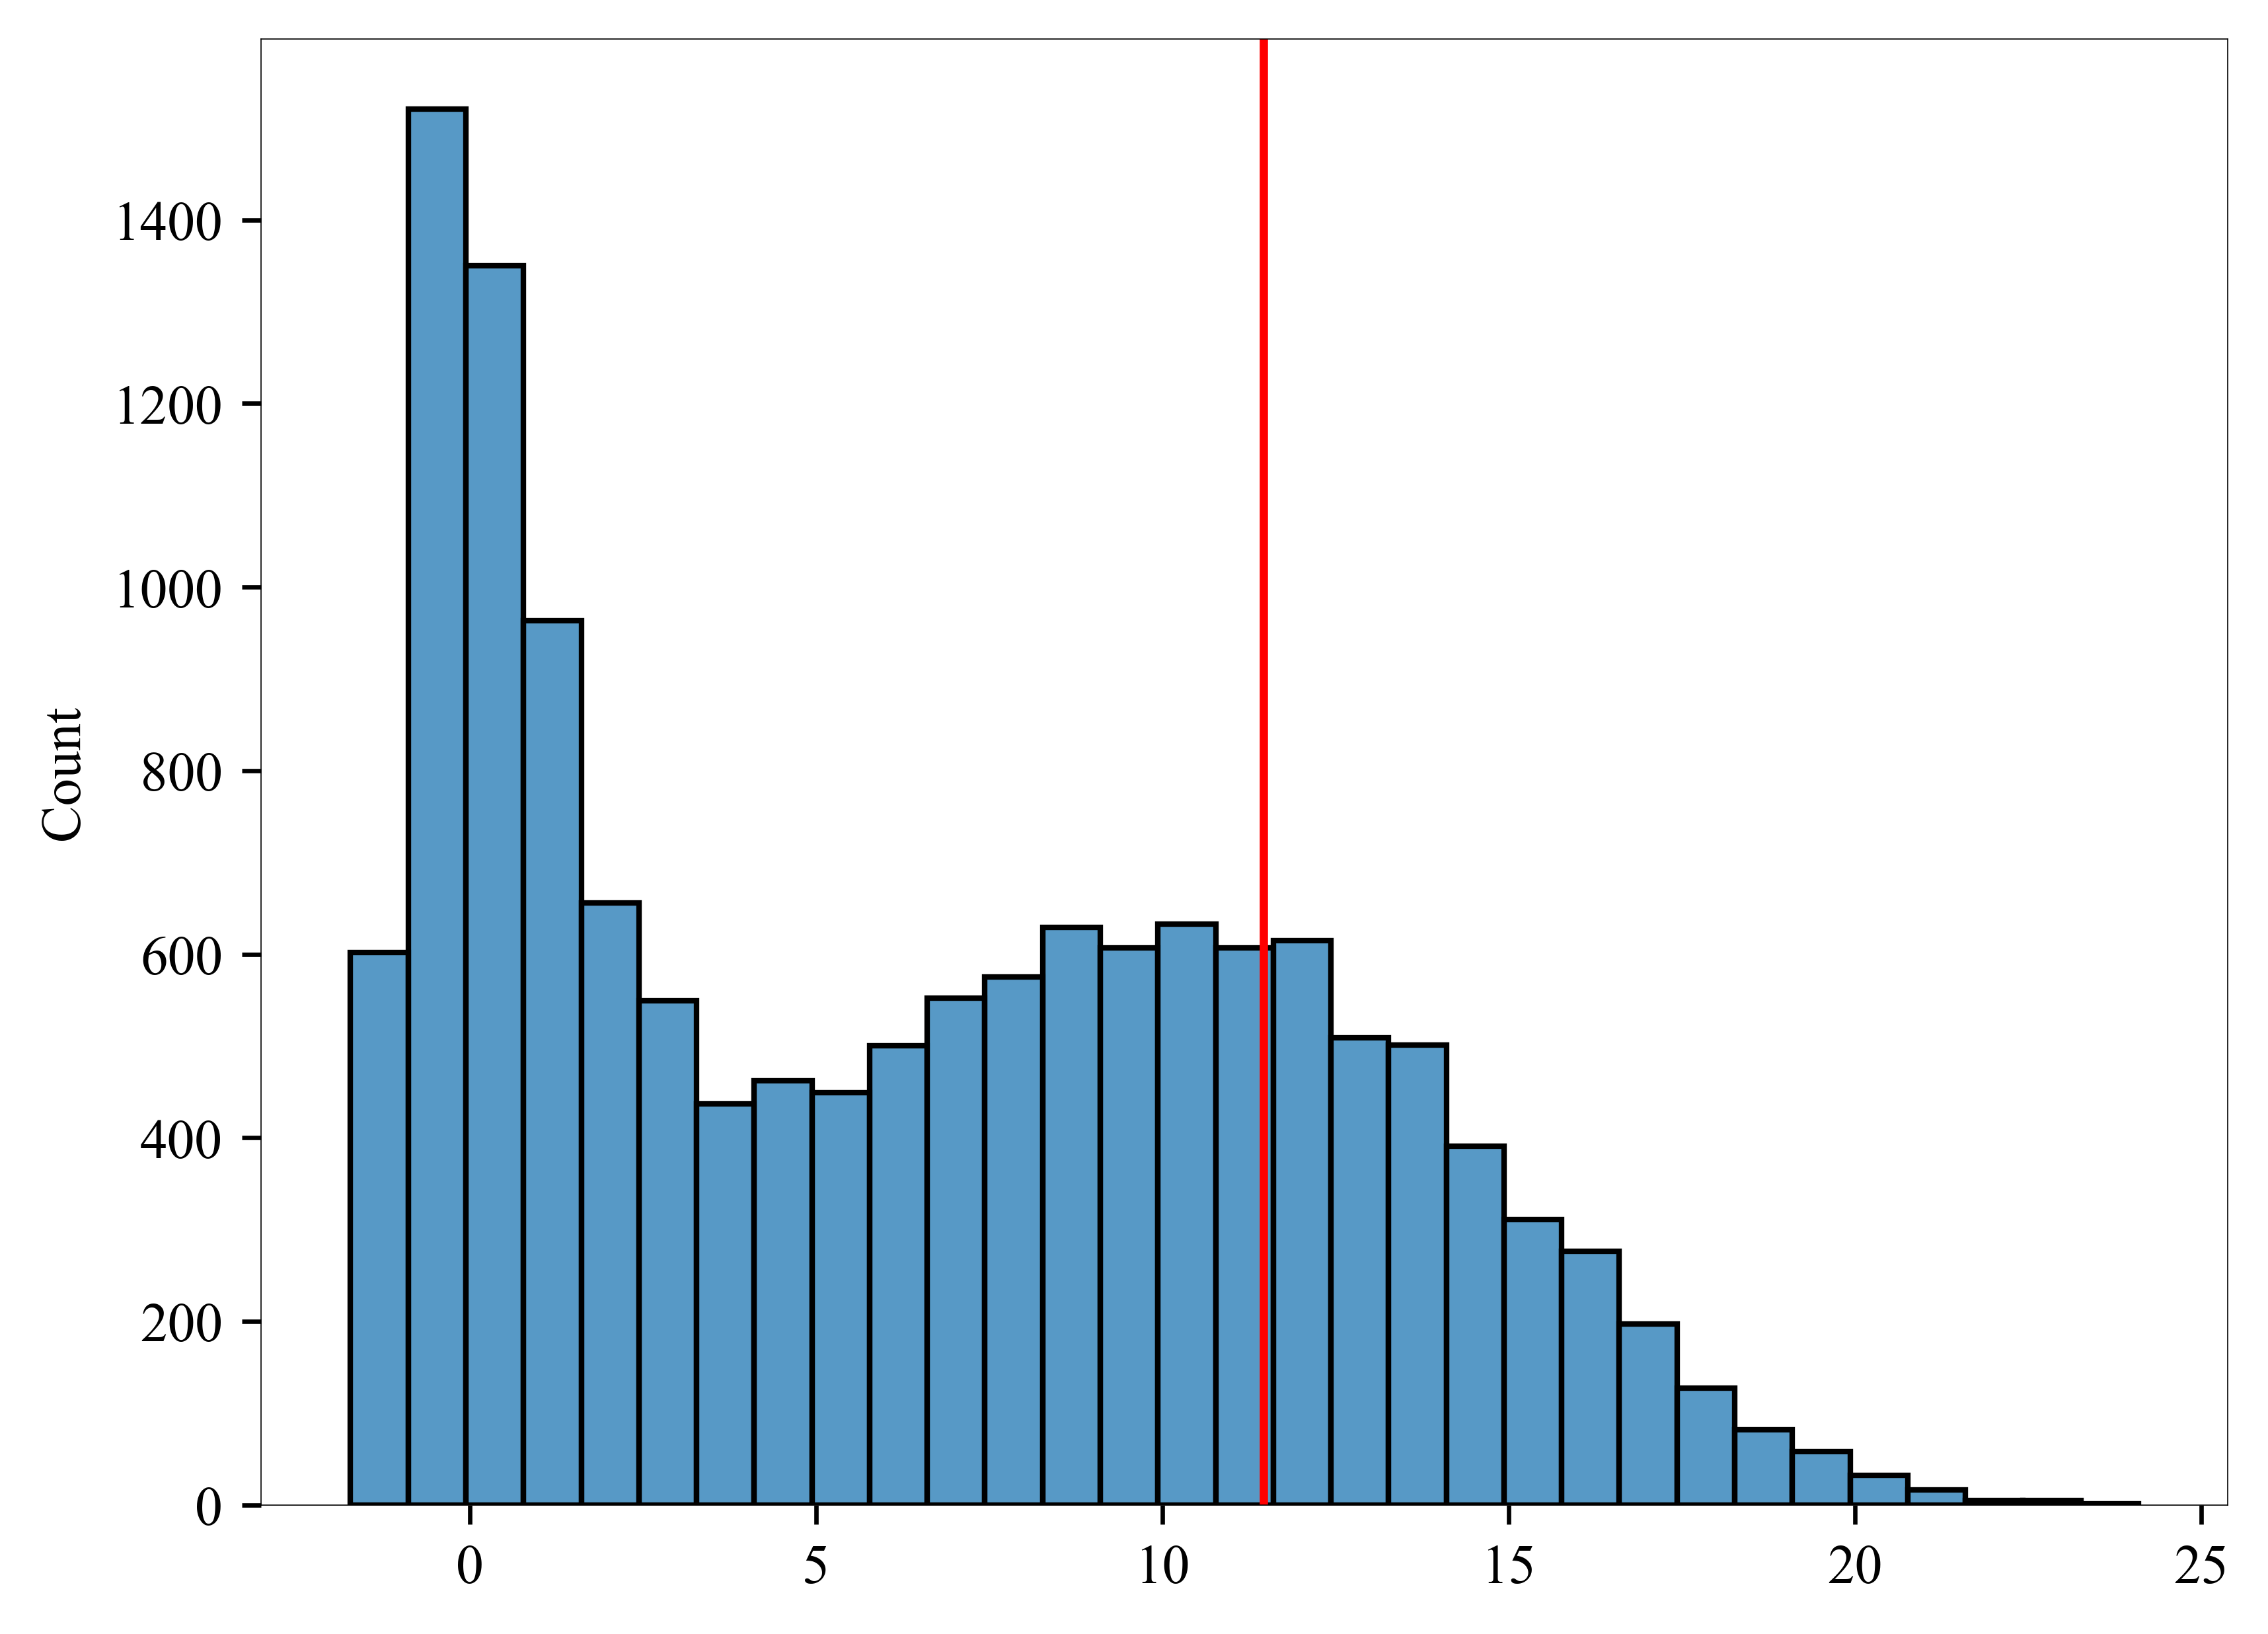

In [6]:
istation = 'Halley'
ivar = 'sst'
ax = sns.histplot(
    pre_weighted_var_icores[expid[i]][istation][ivar]['daily']
)

ax.axvline(
    pre_weighted_var_icores[expid[i]][istation][ivar]['am'],
    c = 'red',
)

# check daily rh2m

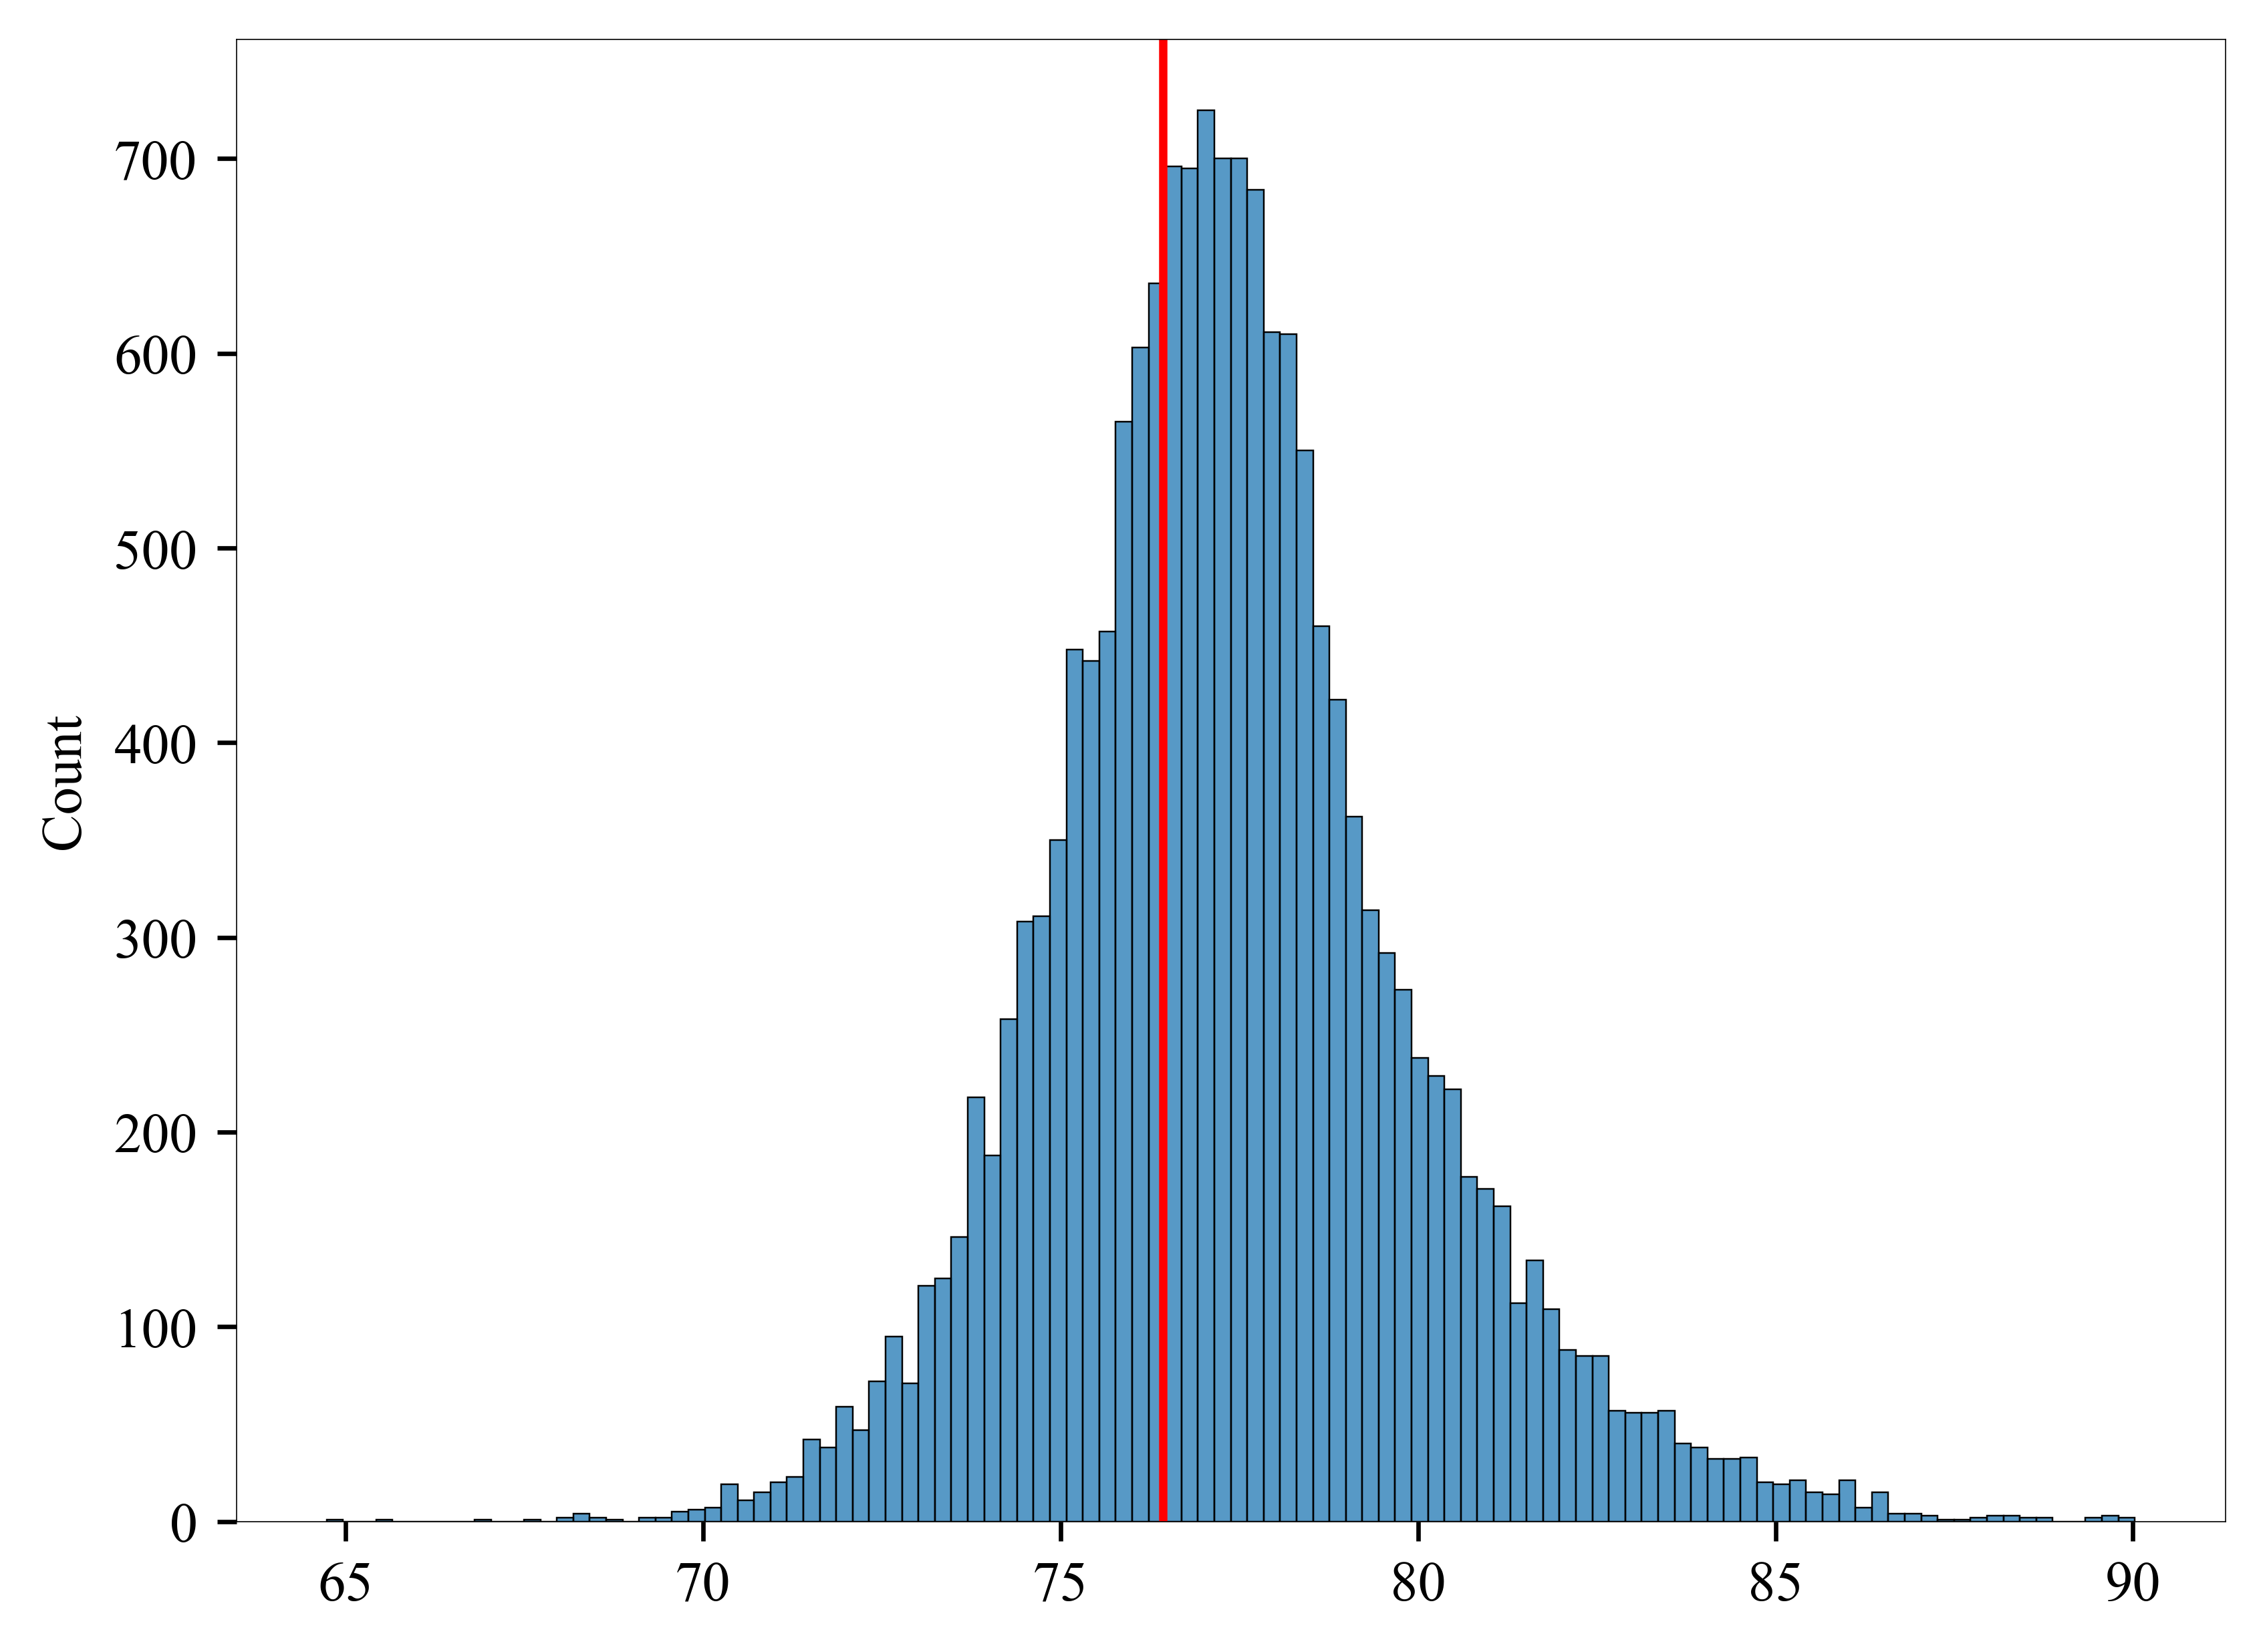

In [7]:
istation = 'EDC'
ivar = 'rh2m'
ax = sns.histplot(
    pre_weighted_var_icores[expid[i]][istation][ivar]['daily']
)

ax.axvline(
    pre_weighted_var_icores[expid[i]][istation][ivar]['am'],
    c = 'red',
)

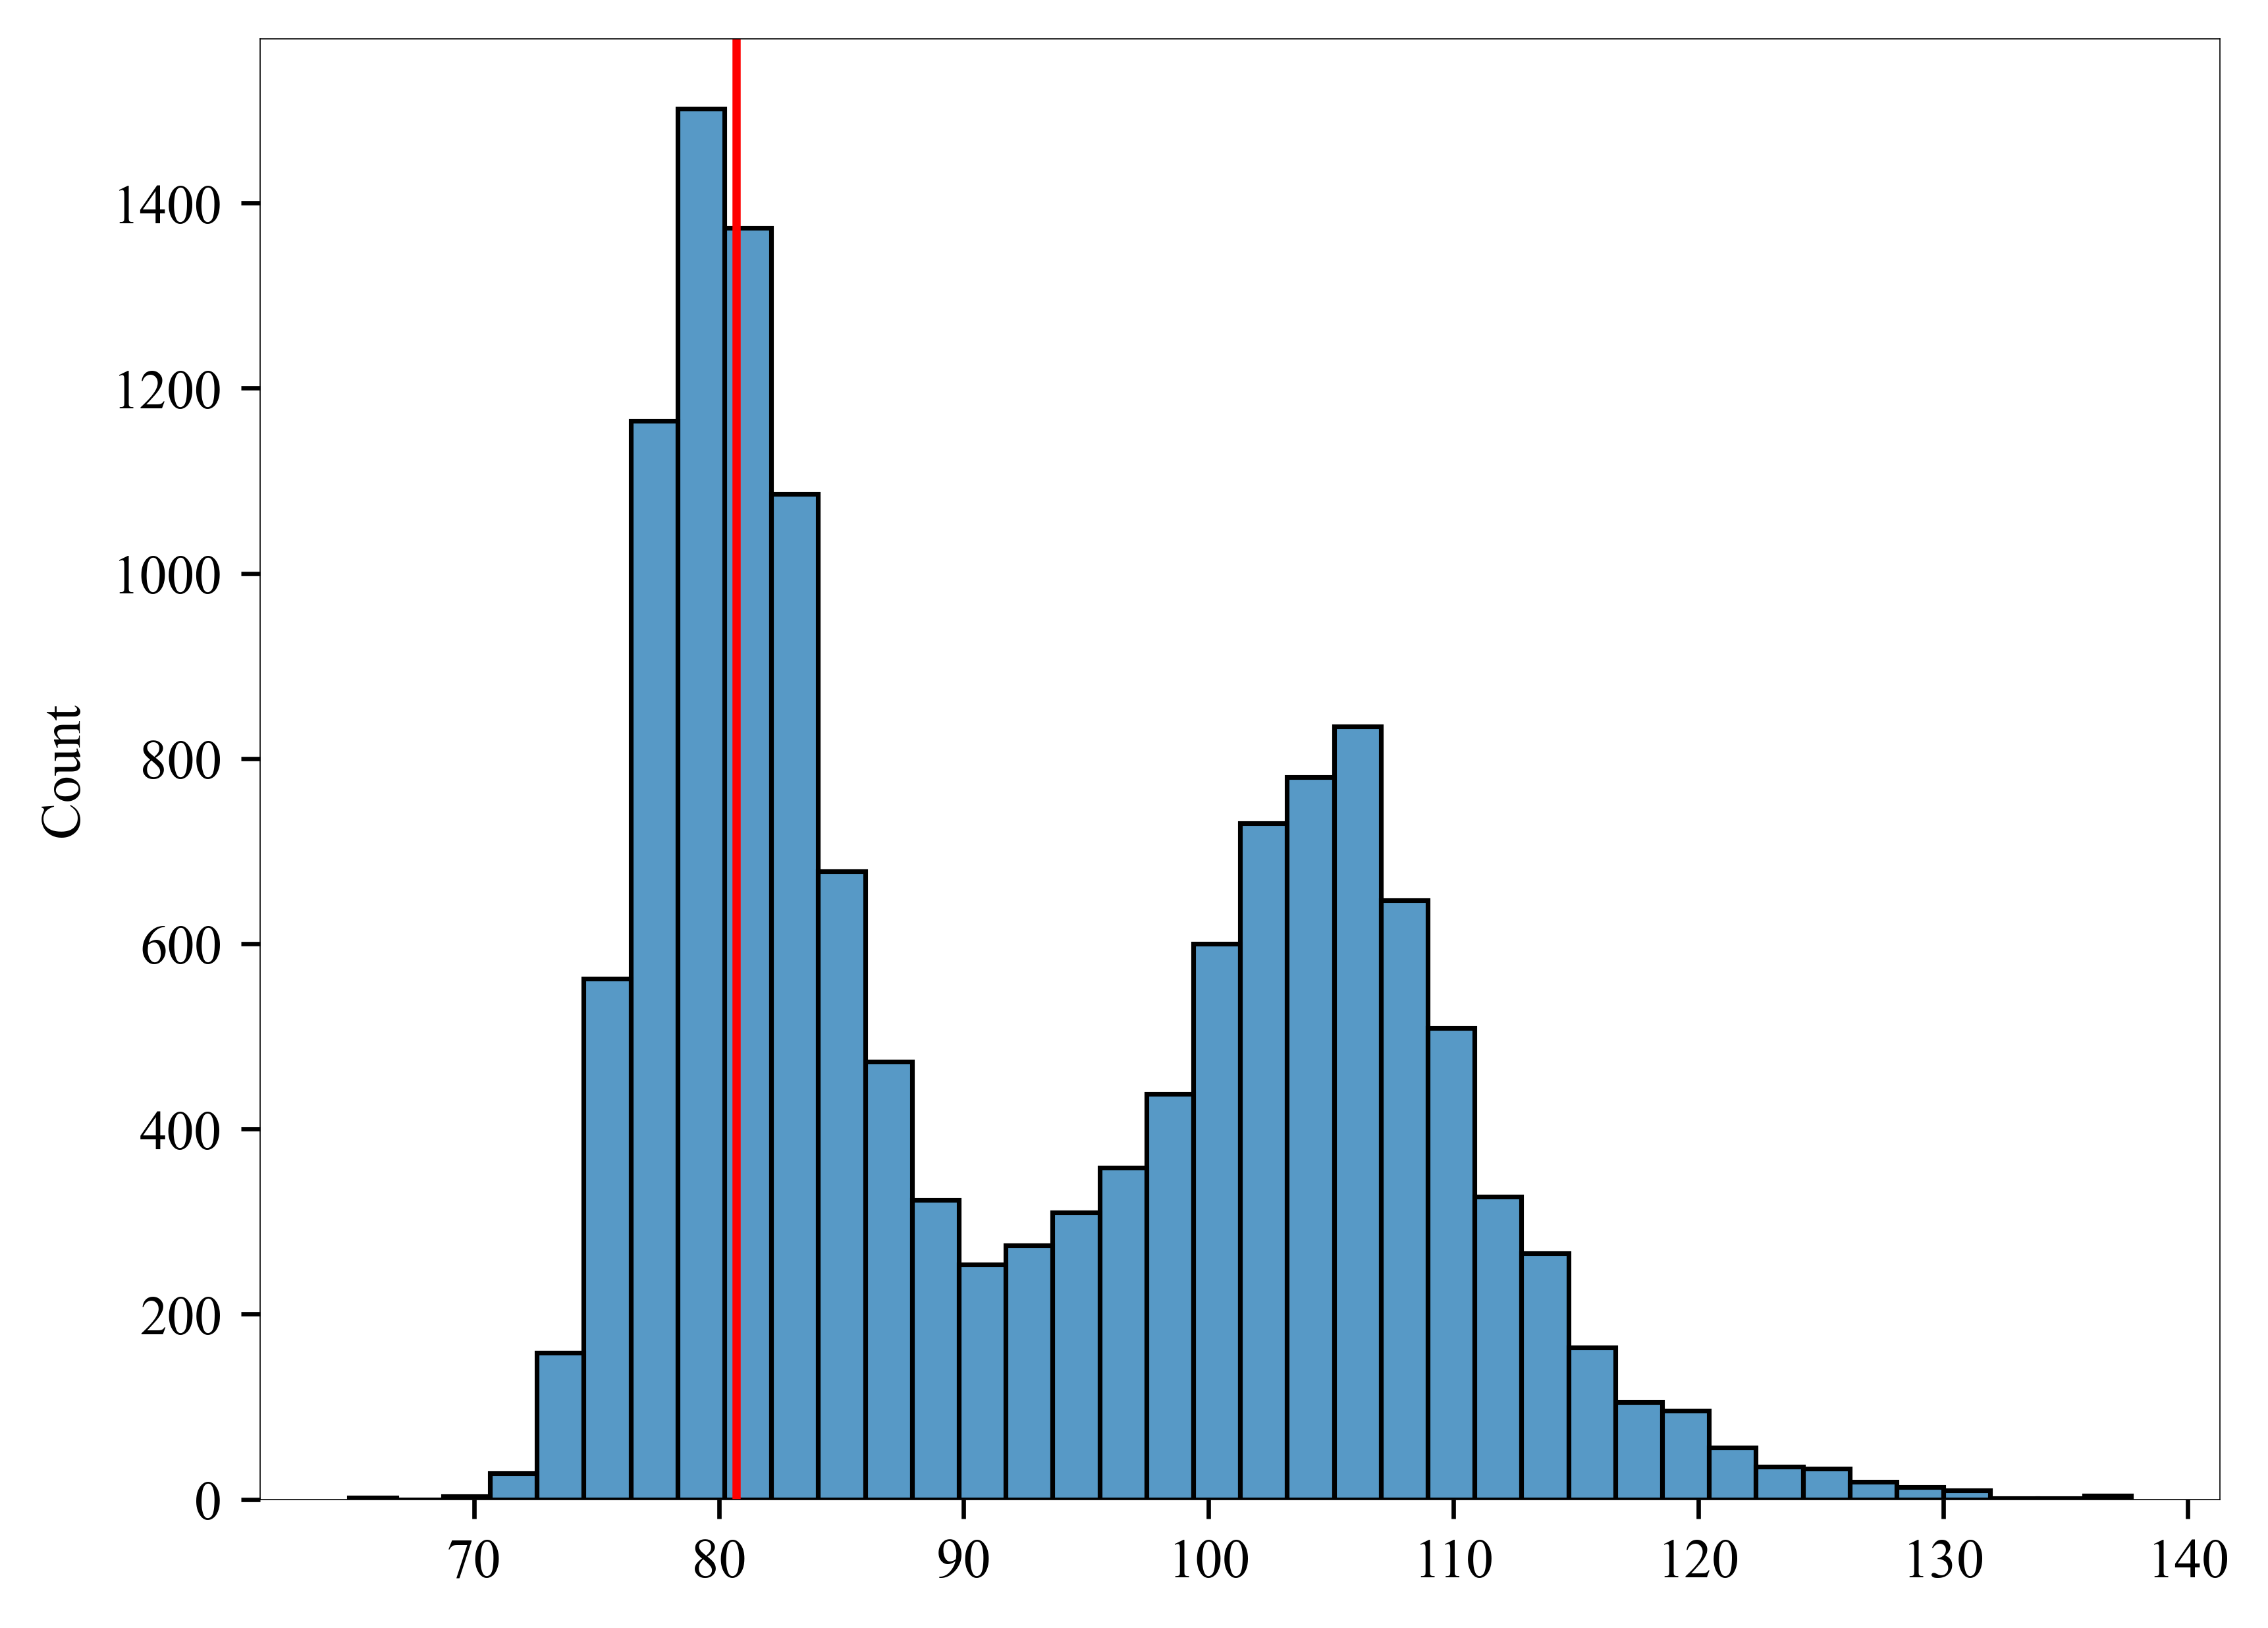

In [8]:
istation = 'Halley'
ivar = 'rh2m'
ax = sns.histplot(
    pre_weighted_var_icores[expid[i]][istation][ivar]['daily']
)

ax.axvline(
    pre_weighted_var_icores[expid[i]][istation][ivar]['am'],
    c = 'red',
)